# PROJET 4 : Segmentez des clients d'un site e-commerce

# Plan de projet

----------------------------------------------------------------------------
**NOTEBOOK 1 : Projet4_Olist_Analyse_exploratoire**

**1.   Définir la problématique**


**2.   Acquisition de données**


**3.   Exploration de données**

- 3.1 Analyse exploratoire des tables 

- 3.2 Création des variables aggrégées et transformations de variables par table

- 3.3 Fusion de tables 

- 3.4 Construction de features finales

- 3.5 Analyse exploratoire de table finale

---------------------------------------------------------------------------------------------------------------
**NOTEBOOK 2 : Projet4_Olist_Modelisation**

**5.   Segmentation managérialle**


**6.   Réduction dimensionnelle**

- 6.1 ACP
- 6.2 ACP à noyau
- 6.3 Isomap

    
**7. Clustering**

- 7.1 Clustering hiérarchique
- 7.2 k-means
- 7.3 DBSCAN
    
    
**8.   Evaluation de la fréquence de mise à jour**

Regarder l'évolution d'ARI dans le temps.



# 0 - Importer les bibliothèques

In [1]:
# Libraries for data treatment
import numpy as np
import pandas as pd
from pandas import DataFrame
import datetime

# Libraries for data visualisation
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Personal modul with useful functions
import fonctions
from fonctions import desc_quali, plot_bar_desc_quali, desc_quanti

# 1 - Définir la problématique

Le but de ce projet est de :
- Créer une segmentation des clients, comprendre les différents types d'utilisateurs grâce à leur comportement et à leur données personnelles
- Fournir une description actionable de la segmentation et de sa logique sous-jacente pour une utilisation optimale
- Fournir une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps

# 2 - Acquisition de données

Le client nous fournit une base de données anonymisée comportant des informations sur l'historique de commandes, les produits achetés, les commentaires de satisfaction et la localisation des clients depuis janvier 2017.

Le schéma de données est représenté par la figure suivante :

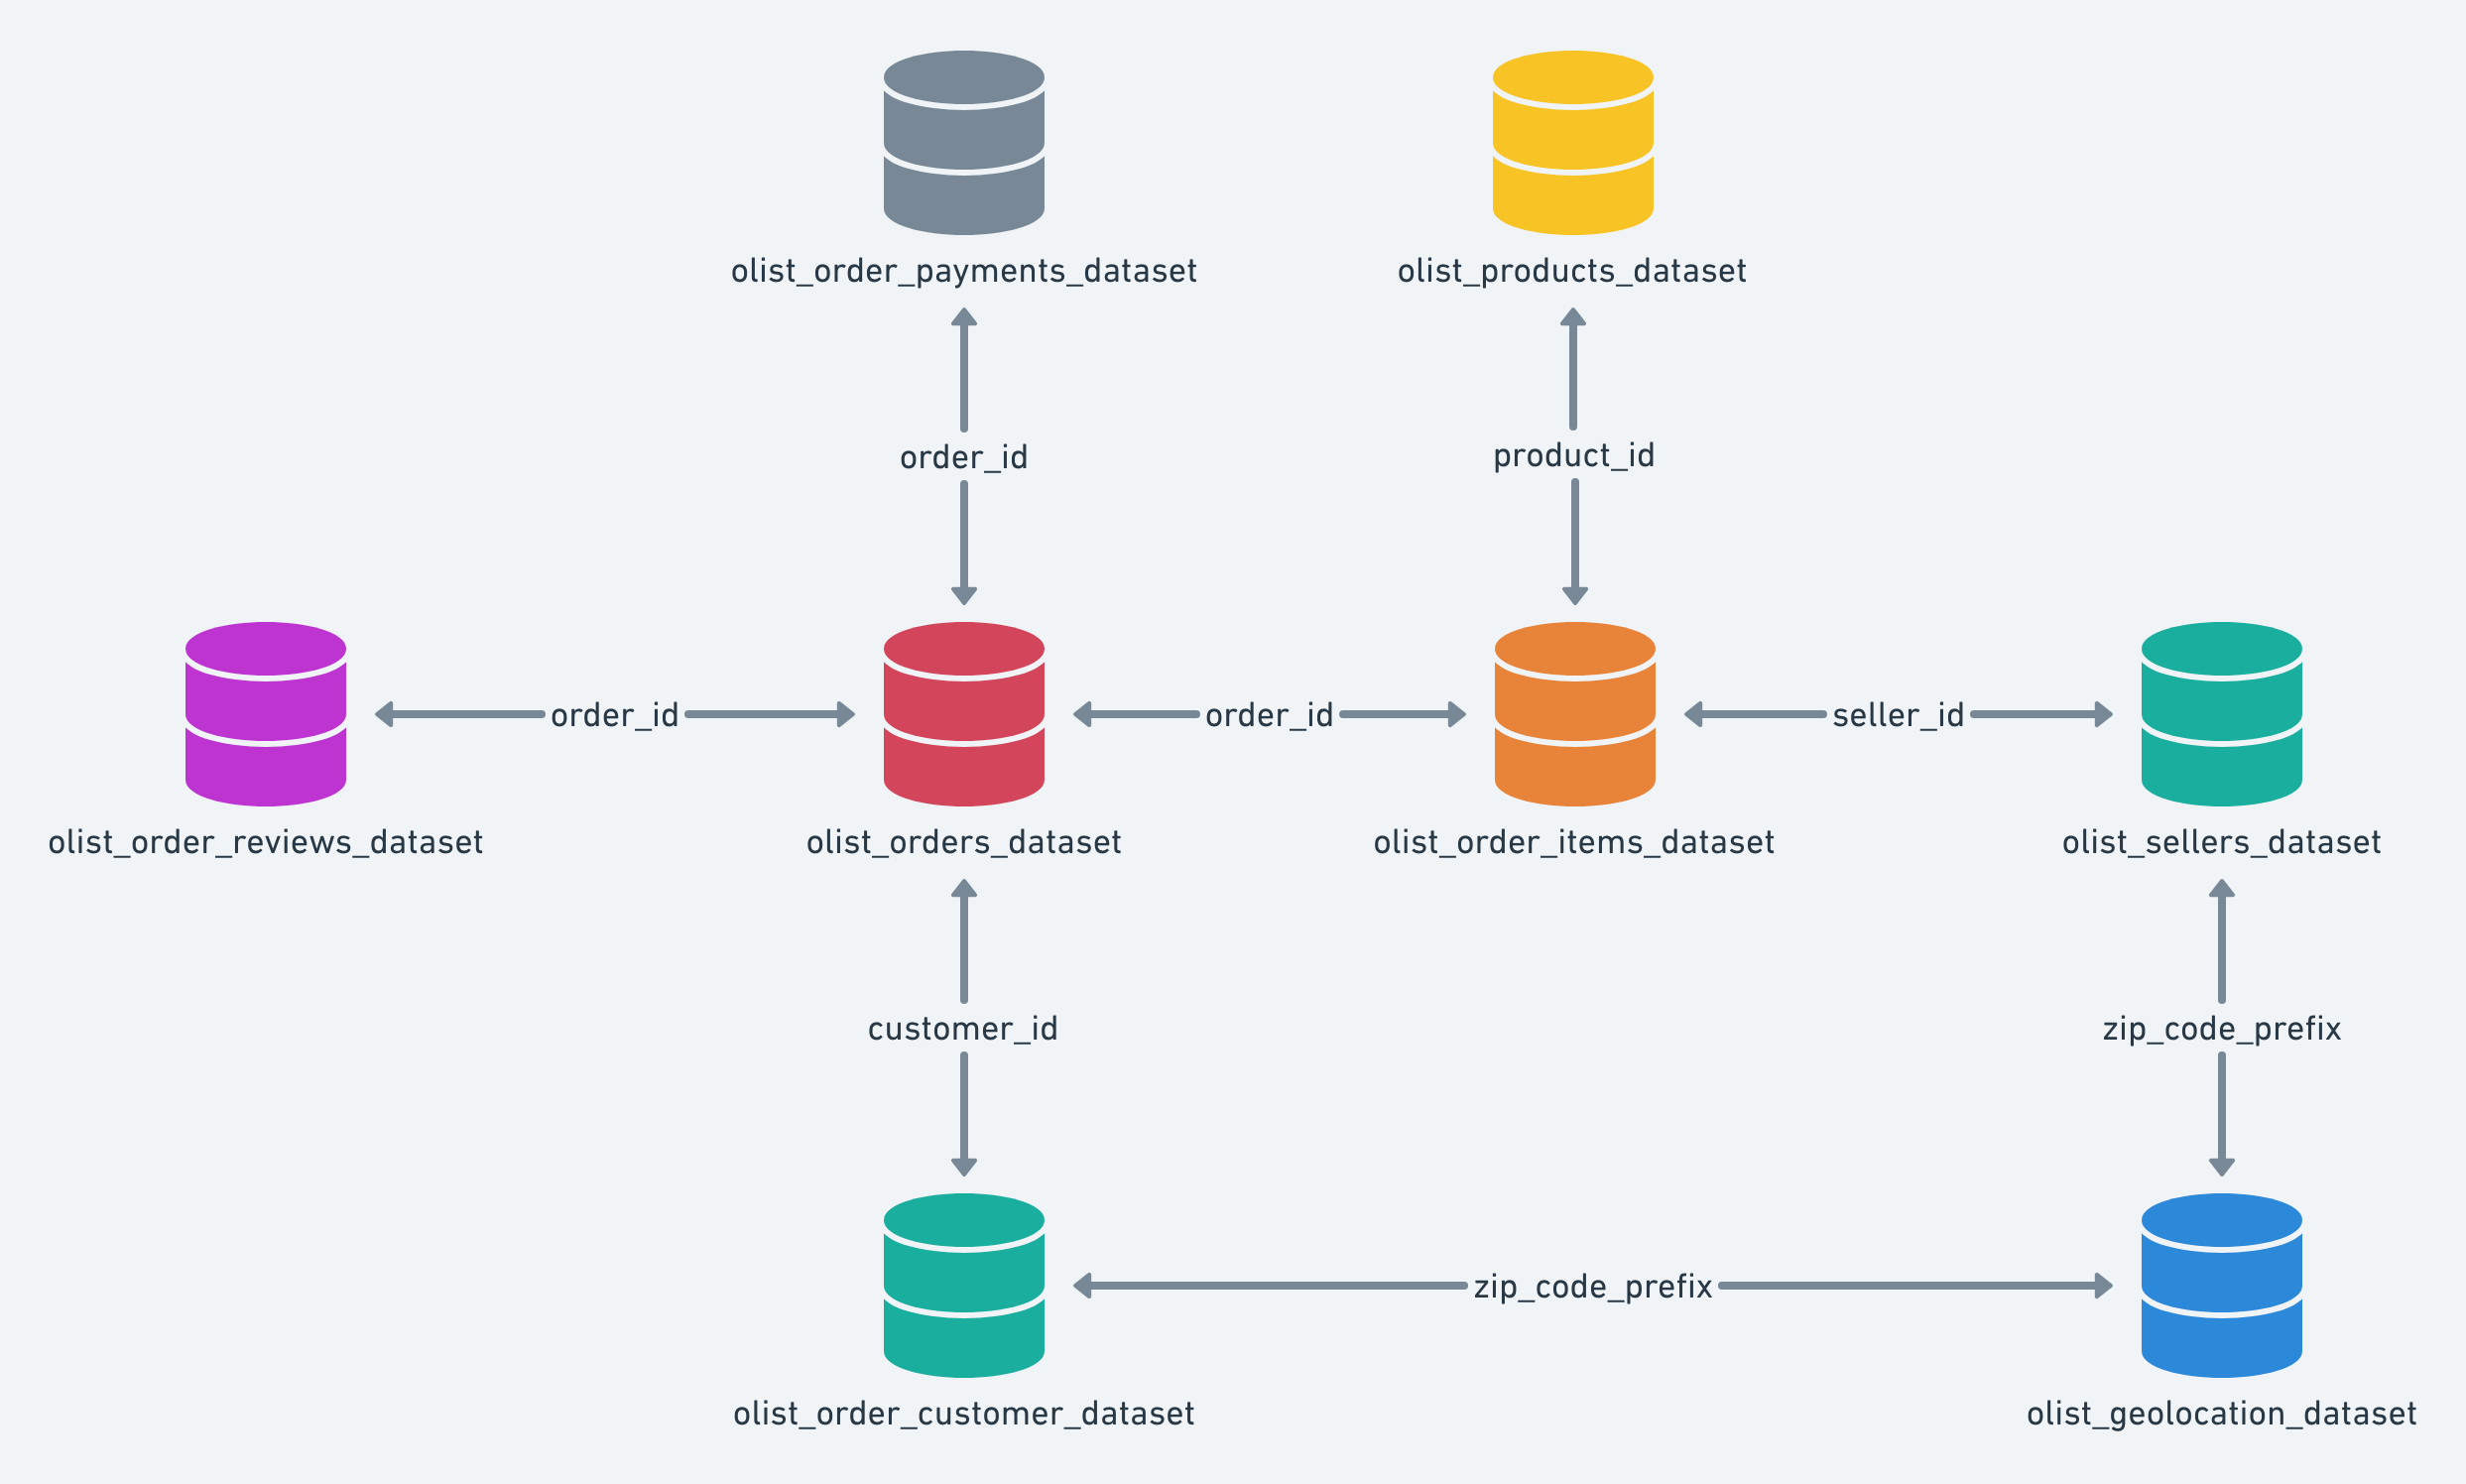

In [3]:
Image('Figures/BDD.png')

In [4]:
# The following code imports the .csv data as pandas DataFrame
olist_customers_dataset = pd.read_csv(
    'Data/olist_customers_dataset.csv', sep=',')

In [5]:
olist_geolocation_dataset = pd.read_csv(
    'Data/olist_geolocation_dataset.csv', sep=',')

In [6]:
olist_order_items_dataset = pd.read_csv(
    'Data/olist_order_items_dataset.csv', sep=',')

In [7]:
olist_order_payments_dataset = pd.read_csv(
    'Data/olist_order_payments_dataset.csv', sep=',')

In [8]:
olist_order_reviews_dataset = pd.read_csv(
    'Data/olist_order_reviews_dataset.csv', sep=',')

In [9]:
olist_orders_dataset = pd.read_csv('Data/olist_orders_dataset.csv', sep=',')

In [10]:
olist_products_dataset = pd.read_csv(
    'Data/olist_products_dataset.csv', sep=',')

In [11]:
olist_sellers_dataset = pd.read_csv('Data/olist_sellers_dataset.csv', sep=',')

In [12]:
product_category_name_translation = pd.read_csv(
    'Data/product_category_name_translation.csv', sep=',')

Après avoir importé les tables, nous allons afficher premières 5 lignes pour chaque table afin d'avoir une notion de leur contenu :

In [13]:
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [14]:
olist_geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [15]:
olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [16]:
olist_order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [17]:
olist_order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [18]:
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [19]:
olist_products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [20]:
olist_sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [21]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Le code suivant nous indique la taille de différentes tables :

In [22]:
olist_customers_dataset.shape

(99441, 5)

In [23]:
olist_geolocation_dataset.shape

(1000163, 5)

In [24]:
olist_order_items_dataset.shape

(112650, 7)

In [25]:
olist_order_payments_dataset.shape

(103886, 5)

In [26]:
olist_order_reviews_dataset.shape

(100000, 7)

In [27]:
olist_orders_dataset.shape

(99441, 8)

In [28]:
olist_products_dataset.shape

(32951, 9)

In [29]:
olist_sellers_dataset.shape

(3095, 4)

In [30]:
product_category_name_translation.shape

(71, 2)

# 3 - Exploration de données

## 3.1 Analyse exploratoire des tables

### 3.1.1 Customers dataset

La table olist_customers_dataset contient les variables suivantes :

- customer_id: key to the orders dataset. Each order has a unique customer_id.
- customer_unique_id: unique identifier of a customer.
- customer_zip_code_prefix: first five digits of customer zip code
- customer_city: customer city name
- customer_state: customer state

In [31]:
desc_city = desc_quali(olist_customers_dataset, 'customer_city')
desc_city

,customer_city,Pourcentage
sao paulo,15540.0,15.63
rio de janeiro,6882.0,6.92
belo horizonte,2773.0,2.79
brasilia,2131.0,2.14
curitiba,1521.0,1.53
campinas,1444.0,1.45
porto alegre,1379.0,1.39
salvador,1245.0,1.25
guarulhos,1189.0,1.20
sao bernardo do campo,938.0,0.94


In [32]:
desc_state = desc_quali(olist_customers_dataset, 'customer_state')
desc_state

,customer_state,Pourcentage
SP,41746.0,41.98
RJ,12852.0,12.92
MG,11635.0,11.70
RS,5466.0,5.50
PR,5045.0,5.07
SC,3637.0,3.66
BA,3380.0,3.40
DF,2140.0,2.15
ES,2033.0,2.04
GO,2020.0,2.03


<Figure size 432x288 with 0 Axes>

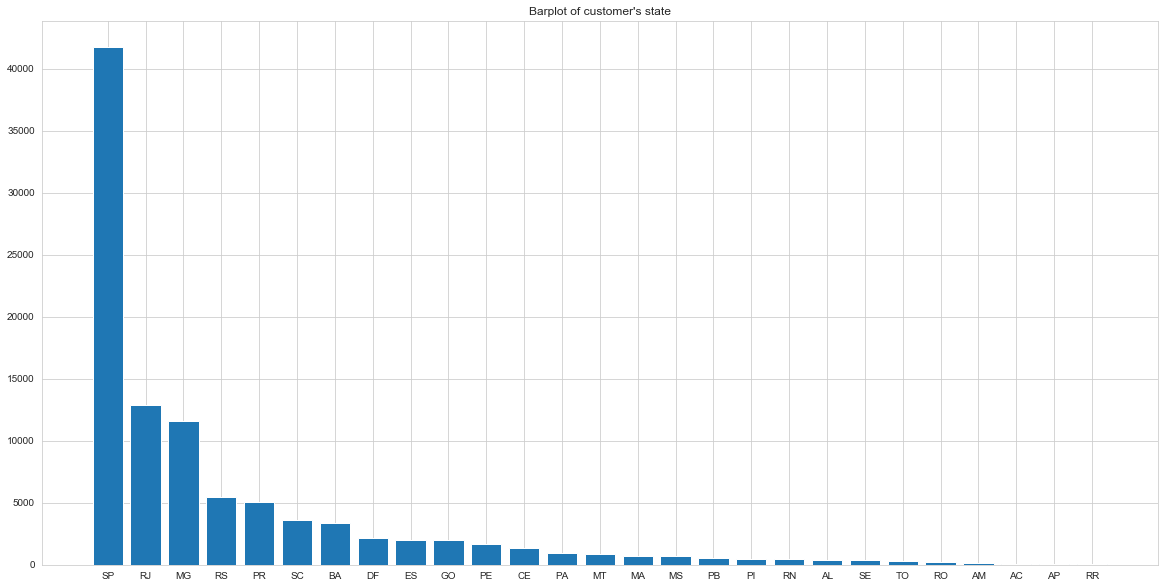

In [33]:
plot_bar_desc_quali(desc_state, 'customer_state',
                    "Barplot of customer's state")

### 3.1.2 Geolocalisation Dataset

La table olist_geolocation_dataset contient les variables suivantes :

- geolocation_zip_code_prefix: first 5 digits of zip code
- geolocation_lat: latitude
- geolocation_lng: longitude
- geolocation_city: city name
- geolocation_state: state

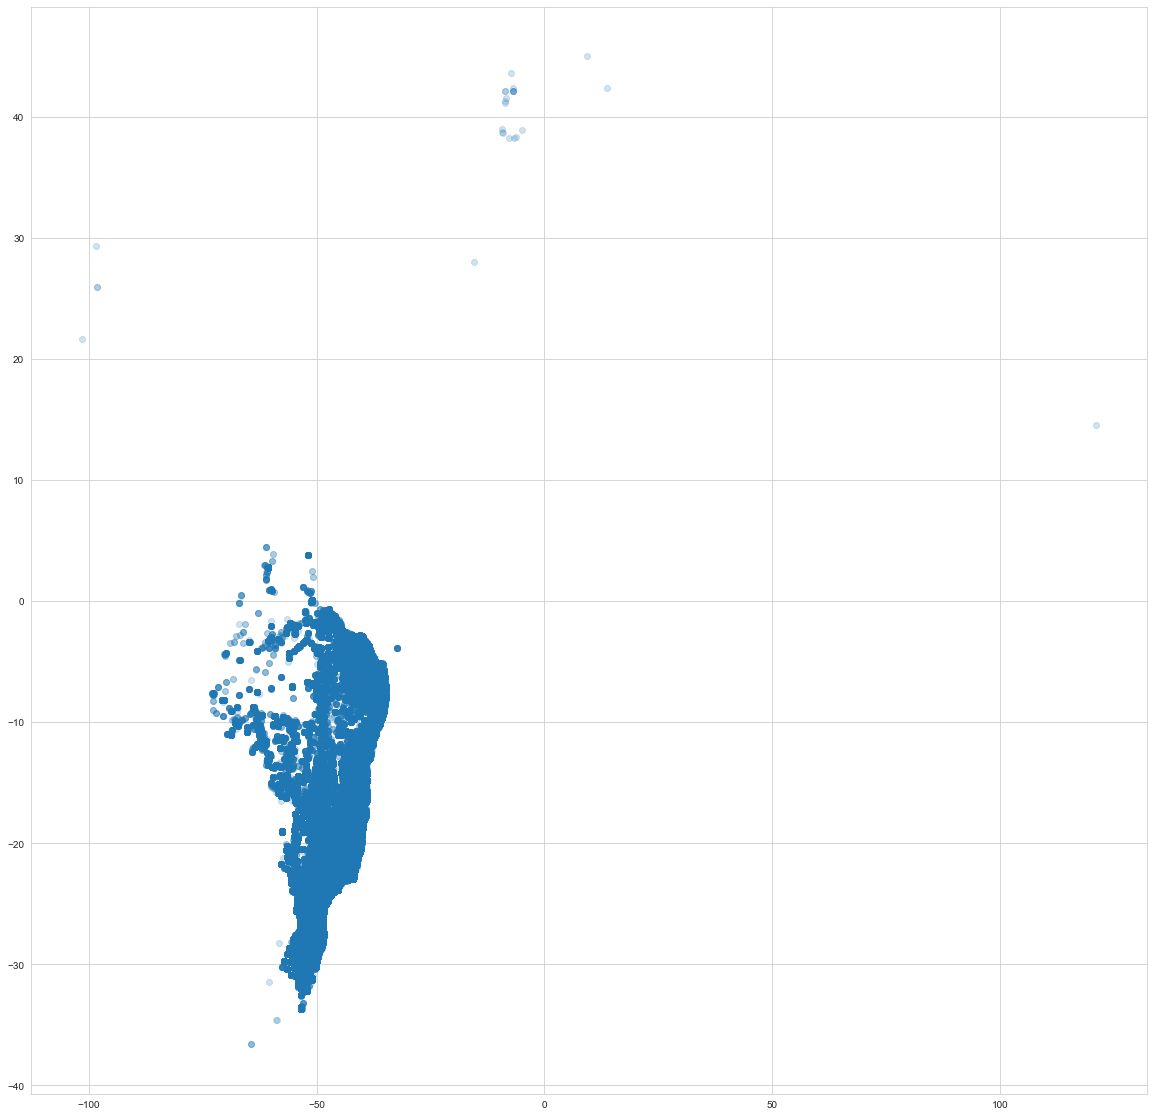

In [34]:
fig = plt.figure(figsize=(20, 20))

plt.scatter(x=olist_geolocation_dataset["geolocation_lng"],
            y=olist_geolocation_dataset["geolocation_lat"], alpha=0.2)

### 3.1.3 Odrer Items Dataset

La table olist_order_items_dataset contient les variables suivantes :

- order_id: order unique identifier
- order_item_id: sequential number identifying number of items included in the same order.
- product_id: product unique identifier
- seller_id: seller unique identifier
- shipping_limit_date: Shows the seller shipping limit date for handling the order over to the logistic partner.
- price: item price
- freight_value: item freight value item (if an order has more than one item the freight value is splitted between items)

In [35]:
olist_order_items_dataset.shape

(112650, 7)

La table contient 112 650 lignes.

In [36]:
sum(olist_order_items_dataset.duplicated())

0

Aucune ligne n'est pas dupliquée.

#### Nombre de produits par commande

In [37]:
sum(olist_order_items_dataset.duplicated('order_id'))

13984

In [38]:
olist_order_items_dataset['order_id'].nunique()

98666

 Il existe 98 666 valeurs uniques de variable order_id. Les order_ids qui ne sont pas unique représentent des ordres de plusieurs produits.

In [39]:
olist_order_items_dataset['product_id'].nunique()

32951

Nous avons 32 951 produits uniques (variable product_id). 

In [40]:
olist_order_items_dataset['order_item_id'].describe()

count    112650.000000
mean          1.197834
std           0.705124
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: order_item_id, dtype: float64

La plupart de commandes contient 1 seul produit, le maximum est 21 produits par commande. Nous allons regarder plus en détail les commander avec plusieurs produits :

In [41]:
desc_quali(olist_order_items_dataset, 'order_item_id')

,order_item_id,Pourcentage
1,98666.0,87.59
2,9803.0,8.70
3,2287.0,2.03
4,965.0,0.86
5,460.0,0.41
6,256.0,0.23
7,58.0,0.05
8,36.0,0.03
9,28.0,0.02
10,25.0,0.02


87.59 % de commandes contient un seul produit.

#### Nombre de vendeurs

In [42]:
olist_order_items_dataset['seller_id'].nunique()

3095

La table contient 3 905 vendeurs distincts.

#### Date limite de livraison

In [43]:
olist_order_items_dataset['shipping_limit_date'].head()

0    2017-09-19 09:45:35
1    2017-05-03 11:05:13
2    2018-01-18 14:48:30
3    2018-08-15 10:10:18
4    2017-02-13 13:57:51
Name: shipping_limit_date, dtype: object

#### Prix

In [44]:
olist_order_items_dataset['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

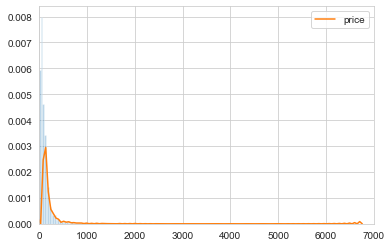

In [45]:
plt.hist(olist_order_items_dataset['price'], alpha=0.3, range=(
    0, 7000),  bins=200, density=True)
sns.kdeplot(olist_order_items_dataset['price'])

plt.xlim(0, 7000)
plt.rcParams['figure.figsize'] = (10, 10)

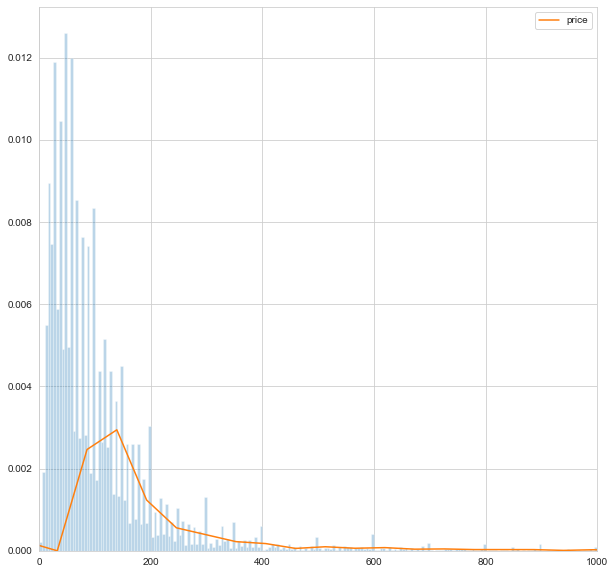

In [46]:
plt.hist(olist_order_items_dataset['price'], alpha=0.3, range=(
    0, 1000),  bins=200, density=True)
sns.kdeplot(olist_order_items_dataset['price'])

plt.xlim(0, 1000)
plt.rcParams['figure.figsize'] = (10, 10)

#### Frais de livraison

In [47]:
olist_order_items_dataset['freight_value'].describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

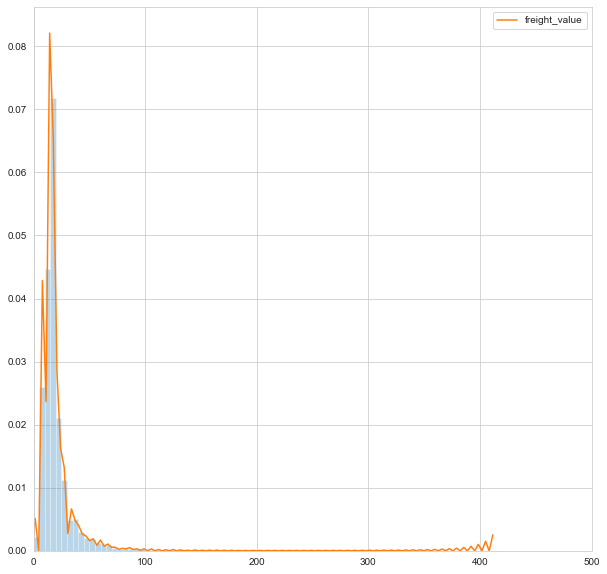

In [48]:
plt.hist(olist_order_items_dataset['freight_value'], alpha=0.3, range=(
    0, 500),  bins=100, density=True)
sns.kdeplot(olist_order_items_dataset['freight_value'])

plt.xlim(0, 500)
plt.rcParams['figure.figsize'] = (10, 10)

### 3.1.4 Payments Dataset

La table olist_order_payments_dataset contient les variables suivantes :

- order_id: unique identifier of an order.
- payment_sequential: a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments.
- payment_type: method of payment chosen by the customer.
- payment_installments: number of installments chosen by the customer.
- payment_value: transaction value.

In [49]:
olist_order_payments_dataset['order_id'].nunique()

99440

In [50]:
olist_order_payments_dataset.shape

(103886, 5)

In [51]:
dupl = olist_order_payments_dataset[olist_order_payments_dataset['order_id'].duplicated(
)]

In [52]:
dupl.sort_values(by='order_id')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
30155,0071ee2429bc1efdc43aa3e073a5290e,2,voucher,1,92.44
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
15298,009ac365164f8e06f59d18a08045f6c4,6,voucher,1,4.17
73837,009ac365164f8e06f59d18a08045f6c4,3,voucher,1,8.25
59042,00b4a910f64f24dbcac04fe54088a443,1,credit_card,1,2.54
34559,00bd50cdd31bd22e9081e6e2d5b3577b,1,credit_card,1,4.88


Pour bien comprendre les données, nous avons afficher une des commandes qui a été payé avec plusieurs moyens de paiement :

In [53]:
olist_order_payments_dataset[olist_order_payments_dataset['order_id']
                             == '002f19a65a2ddd70a090297872e6d64e']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
20036,002f19a65a2ddd70a090297872e6d64e,1,voucher,1,44.11
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18


In [54]:
olist_order_items_dataset[olist_order_items_dataset['order_id']
                          == '002f19a65a2ddd70a090297872e6d64e']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
79,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31


Nous pouvons voir que le payment_sequential est une suite de nombre entiers pour chaque paiement. La somme de payment_value est égale à la valeur de la commande : price + freight_value

#### Nombre de méthodes de paiement

In [55]:
desc_quanti(olist_order_payments_dataset, 'payment_sequential')

,count,mean,std,min,25%,50%,75%,max,NaN
payment_sequential,103886.0,1.09,0.71,1.0,1.0,1.0,1.0,29.0,0.0


In [56]:
desc_quali(olist_order_payments_dataset, 'payment_sequential')

,payment_sequential,Pourcentage
1,99360.0,95.64
2,3039.0,2.93
3,581.0,0.56
4,278.0,0.27
5,170.0,0.16
6,118.0,0.11
7,82.0,0.08
8,54.0,0.05
9,43.0,0.04
10,34.0,0.03


#### Type de paiement

In [57]:
payment_type = desc_quali(olist_order_payments_dataset, 'payment_type')
payment_type

,payment_type,Pourcentage
credit_card,76795.0,73.92
boleto,19784.0,19.04
voucher,5775.0,5.56
debit_card,1529.0,1.47
not_defined,3.0,0.00
NaN,0.0,0.00


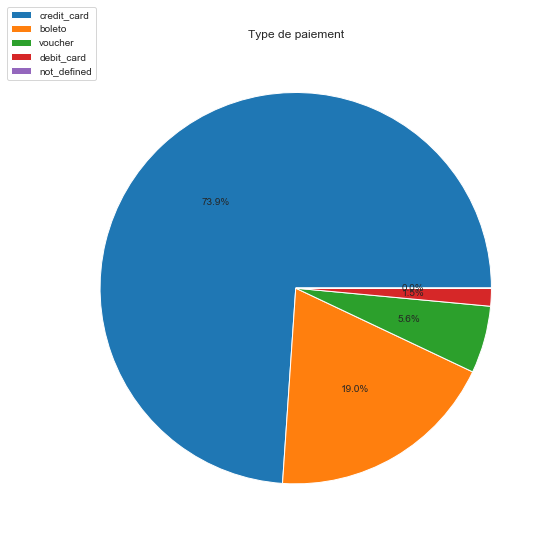

In [58]:
fig = plt.figure(figsize=(9, 9))

plt.title('Type de paiement')
plt.pie(payment_type['payment_type'][:-1], autopct='%1.1f%%')
plt.legend(payment_type.index[:-1],
           loc='center left', bbox_to_anchor=(-0.1, 1.))

#### Nombre d'échéances

In [59]:
payment_installements = desc_quali(
    olist_order_payments_dataset, 'payment_installments')
payment_installements

,payment_installments,Pourcentage
1,52546.0,50.58
2,12413.0,11.95
3,10461.0,10.07
4,7098.0,6.83
10,5328.0,5.13
5,5239.0,5.04
8,4268.0,4.11
6,3920.0,3.77
7,1626.0,1.57
9,644.0,0.62


<Figure size 720x720 with 0 Axes>

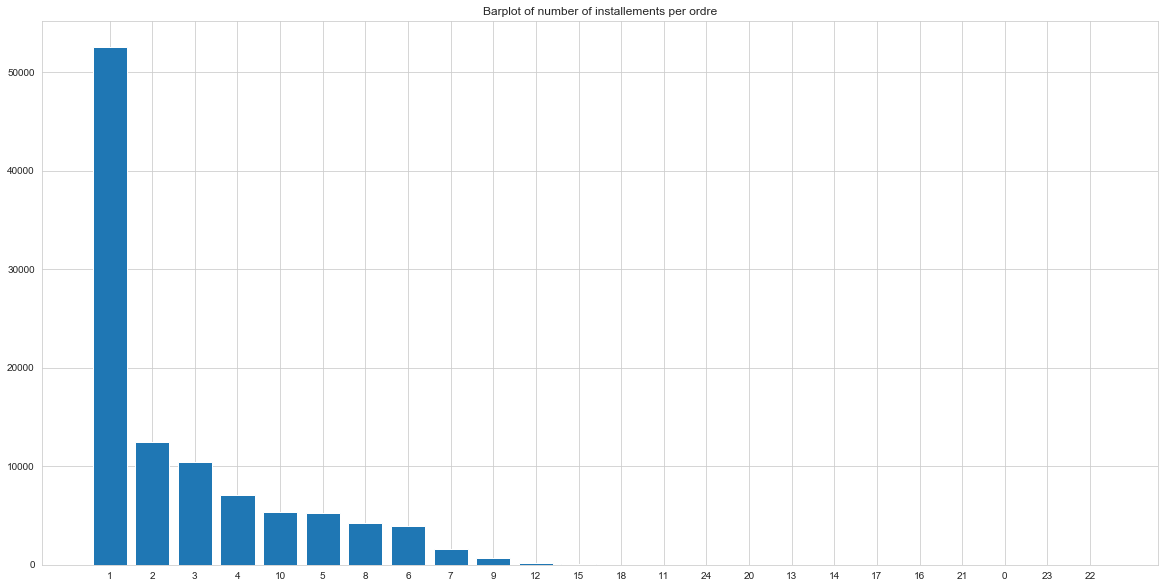

In [60]:
plot_bar_desc_quali(payment_installements, 'payment_installments',
                    "Barplot of number of installements per ordre")

#### Valeur de transaction

In [61]:
desc_quanti(olist_order_payments_dataset, 'payment_value')

,count,mean,std,min,25%,50%,75%,max,NaN
payment_value,103886.0,154.1,217.49,0.0,56.79,100.0,171.84,13664.08,0.0


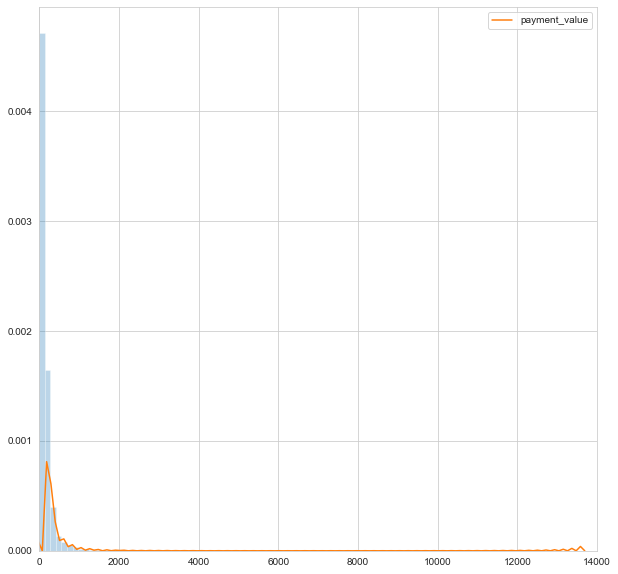

In [62]:
plt.hist(olist_order_payments_dataset['payment_value'], alpha=0.3, range=(
    0, 14000),  bins=100, density=True)
sns.kdeplot(olist_order_payments_dataset['payment_value'])

plt.xlim(0, 14000)
plt.rcParams['figure.figsize'] = (12, 12)

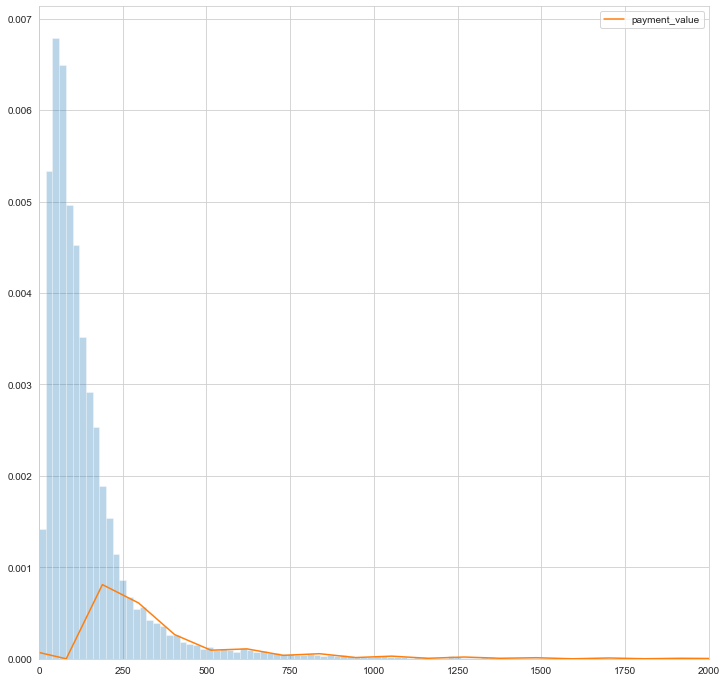

In [63]:
plt.hist(olist_order_payments_dataset['payment_value'], alpha=0.3, range=(
    0, 2000),  bins=100, density=True)
sns.kdeplot(olist_order_payments_dataset['payment_value'])

plt.xlim(0, 2000)
plt.rcParams['figure.figsize'] = (12, 12)

### 3.1.5 Order Reviews Dataset

La table olist_order_reviews_dataset contient les variables suivantes :

- review_id: unique review identifier
- order_id: unique order identifier
- review_score: Note ranging from 1 to 5 given by the customer on a satisfaction survey.
- review_comment_title: Comment title from the review left by the customer, in Portuguese.
- review_comment_message: Comment message from the review left by the customer, in Portuguese.
- review_creation_date: Shows the date in which the satisfaction survey was sent to the customer.
- review_answer_timestamp: Shows satisfaction survey answer timestamp.

In [64]:
olist_order_reviews_dataset.shape

(100000, 7)

La table contient 100 000 ratings.

#### Nombre de ratings uniques

In [65]:
olist_order_reviews_dataset['review_id'].nunique()

99173

Nous avons 99 173 ratings uniques.

In [66]:
review_duplicated = olist_order_reviews_dataset[olist_order_reviews_dataset.duplicated(
    'review_id')]

In [67]:
review_duplicated.shape

(827, 7)

In [68]:
review_duplicated.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3337,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37
5757,308316408775d1600dad81bd3184556d,3fe4dbcdb046a475dbf25463c1ca78bd,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09
7266,8ee90ac383cf825bb7f4756130d4e74a,75d5d3d16567a27eefc5752aeb063072,5,NaN,recomendo,2017-05-30 00:00:00,2017-06-02 18:16:17
7859,d433c252647c51309432ca0b763f969b,191abde9c3bf77d1ce67d100d8db6d15,1,NaN,NaN,2017-09-03 00:00:00,2017-09-06 16:11:00
9077,03a6a25db577d0689440933055111897,3fde8b7313af6b37b84b5c7594d7add0,5,NaN,Muito Bom! Gostei Bastante! Tecido Ótimo! Aten...,2017-12-15 00:00:00,2017-12-16 01:32:18


In [69]:
olist_order_reviews_dataset[olist_order_reviews_dataset['review_id']
                            == '3242cc306a9218d0377831e175d62fbf']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1016,3242cc306a9218d0377831e175d62fbf,711246846695fa895c1776f0ddc30b20,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37
3337,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37


Nous avons 827 ratings en double. Certains ratings, comme par exemple celui ci-dessus, sont lié aux commandes différents, l'acheteur a donc parfois commenté plusieurs commandes à la fois.

#### Review score

In [70]:
desc_quanti(olist_order_reviews_dataset, 'review_score')

,count,mean,std,min,25%,50%,75%,max,NaN
review_score,100000.0,4.07,1.36,1.0,4.0,5.0,5.0,5.0,0.0


In [71]:
review_score = desc_quali(olist_order_reviews_dataset, 'review_score')
review_score

,review_score,Pourcentage
5,57420.0,57.42
4,19200.0,19.20
1,11858.0,11.86
3,8287.0,8.29
2,3235.0,3.24
NaN,0.0,0.00


In [72]:
review_score_plt = review_score[:-1].sort_index()

([<matplotlib.axis.XTick at 0x18b786d8>,
 <a list of 5 Text xticklabel objects>)

<Figure size 864x864 with 0 Axes>

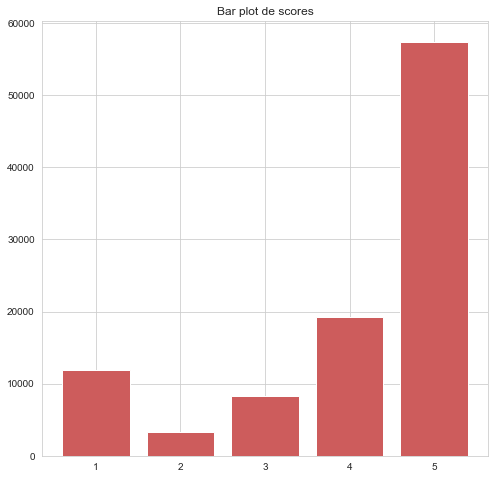

In [73]:
plt.figure()
fig = plt.figure(figsize=(8, 8))
plt.title('Bar plot de scores')
plt.bar(range(
    review_score_plt.shape[0]), review_score_plt['review_score'], color='indianred')
plt.xticks(range(review_score_plt.shape[0]), review_score_plt.index)

#### Titre de commentaire

In [74]:
review_comment_title = desc_quali(
    olist_order_reviews_dataset, 'review_comment_title')
review_comment_title.head()

,review_comment_title,Pourcentage
Recomendo,426.0,3.64
recomendo,346.0,2.95
Bom,294.0,2.51
super recomendo,271.0,2.31
Excelente,248.0,2.12


In [75]:
review_comment_title[-1:]

,review_comment_title,Pourcentage
NaN,88285.0,88.0


88 % de titres de commentaires est manquant.

#### Commentaire

In [76]:
review_comment_message = desc_quali(
    olist_order_reviews_dataset, 'review_comment_message')
review_comment_message.head()

,review_comment_message,Pourcentage
Muito bom,230.0,0.55
Bom,189.0,0.45
muito bom,122.0,0.29
bom,107.0,0.26
Recomendo,100.0,0.24


In [77]:
review_comment_message[-1:]

,review_comment_message,Pourcentage
NaN,58247.0,58.0


58 % de commentaires est manquant.

#### Date de commentaire

Nous avons deux variables de date : 
    
- review_creation_date, la date d'envoi de questionnaire
- review_answer_timestamp, la date de réponse

In [78]:
olist_order_reviews_dataset['review_creation_date'].head()

0    2018-01-18 00:00:00
1    2018-03-10 00:00:00
2    2018-02-17 00:00:00
3    2017-04-21 00:00:00
4    2018-03-01 00:00:00
Name: review_creation_date, dtype: object

In [79]:
olist_order_reviews_dataset['review_answer_timestamp'].head()

0    2018-01-18 21:46:59
1    2018-03-11 03:05:13
2    2018-02-18 14:36:24
3    2017-04-21 22:02:06
4    2018-03-02 10:26:53
Name: review_answer_timestamp, dtype: object

Avant d'effectuer les opérations numériques sur les dates (comme création d'une feateure de délais de réponse), il faudra transformer les variables en datetime de Python. 

### 3.1.6 Order Dataset

La table olist_orders_dataset contient les variables suivantes :

- order_id: unique identifier of the order.
- customer_id: key to the customer dataset. Each order has a unique customer_id.
- order_status: Reference to the order status (delivered, shipped, etc).
- order_purchase_timestamp: Shows the purchase timestamp.
- order_approved_at: Shows the payment approval timestamp.
- order_delivered_carrier_date: Shows the order posting timestamp. When it was handled to the logistic partner.
- order_delivered_customer_date: Shows the actual order delivery date to the customer.
- order_estimated_delivery_date: Shows the estimated delivery date that was informed to customer at the purchase moment.

In [80]:
olist_orders_dataset.shape

(99441, 8)

In [81]:
olist_orders_dataset['order_id'].nunique()

99441

In [82]:
olist_orders_dataset['customer_id'].nunique()

99441

La table contient uniques numéro de commandes avec leur customer_id associé qui est également unique. Nous avons aussi plusieurs variables de type date qui indiquent quand la commande était effectuée, validée, transmise au transporteur et livrée chez le client.   

#### Statut de la commande

In [83]:
order_status = desc_quali(olist_orders_dataset, 'order_status')
order_status

,order_status,Pourcentage
delivered,96478.0,97.02
shipped,1107.0,1.11
canceled,625.0,0.63
unavailable,609.0,0.61
invoiced,314.0,0.32
processing,301.0,0.30
created,5.0,0.01
approved,2.0,0.00
NaN,0.0,0.00


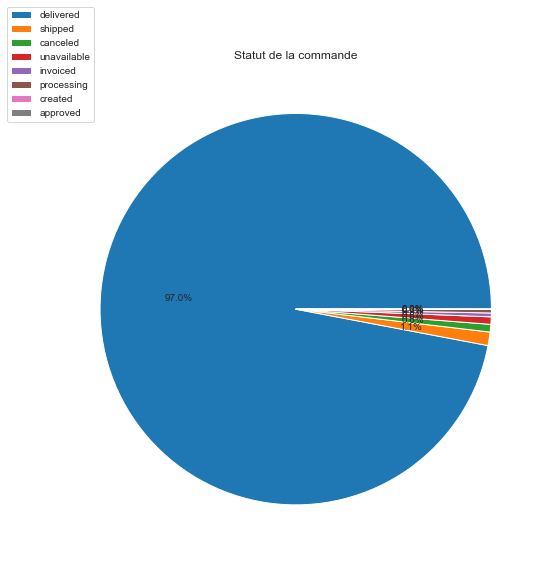

In [84]:
fig = plt.figure(figsize=(9, 9))

plt.title('Statut de la commande')
plt.pie(order_status['order_status'][:-1], autopct='%1.1f%%')
plt.legend(order_status.index[:-1],
           loc='center left', bbox_to_anchor=(-0.1, 1.))

### 3.1.7 Products Dataset

La table olist_products_dataset contient les variables suivantes :

- product_id: unique product identifier
- product_category_name: root category of product, in Portuguese.
- product_name_lenght: number of characters extracted from the product name.
- product_description_lenght: number of characters extracted from the product description.
- product_photos_qty: number of product published photos
- product_weight_g: product weight measured in grams.
- product_length_cm: product length measured in centimeters.
- product_height_cm: product height measured in centimeters.
- product_width_cm: product width measured in centimeters.

In [85]:
olist_products_dataset['product_id'].nunique()

32951

In [86]:
olist_products_dataset.shape

(32951, 9)

La table contient 32 951 produits uniques.

#### Catégories de produits

Nous allons merger la table de produits avec la table de traduction pour avoir les noms de catégories en anglais.

In [87]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [88]:
olist_products_dataset = olist_products_dataset.merge(
    product_category_name_translation, on='product_category_name', how='left')

In [89]:
olist_products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [90]:
product_category = desc_quali(
    olist_products_dataset, 'product_category_name_english')
product_category

,product_category_name_english,Pourcentage
bed_bath_table,3029.0,9.37
sports_leisure,2867.0,8.87
furniture_decor,2657.0,8.22
health_beauty,2444.0,7.56
housewares,2335.0,7.22
auto,1900.0,5.88
computers_accessories,1639.0,5.07
toys,1411.0,4.36
watches_gifts,1329.0,4.11
telephony,1134.0,3.51


In [91]:
product_category = product_category[:-1]

In [92]:
product_category.sort_values(
    by='product_category_name_english', ascending=True, inplace=True)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<Figure size 864x864 with 0 Axes>

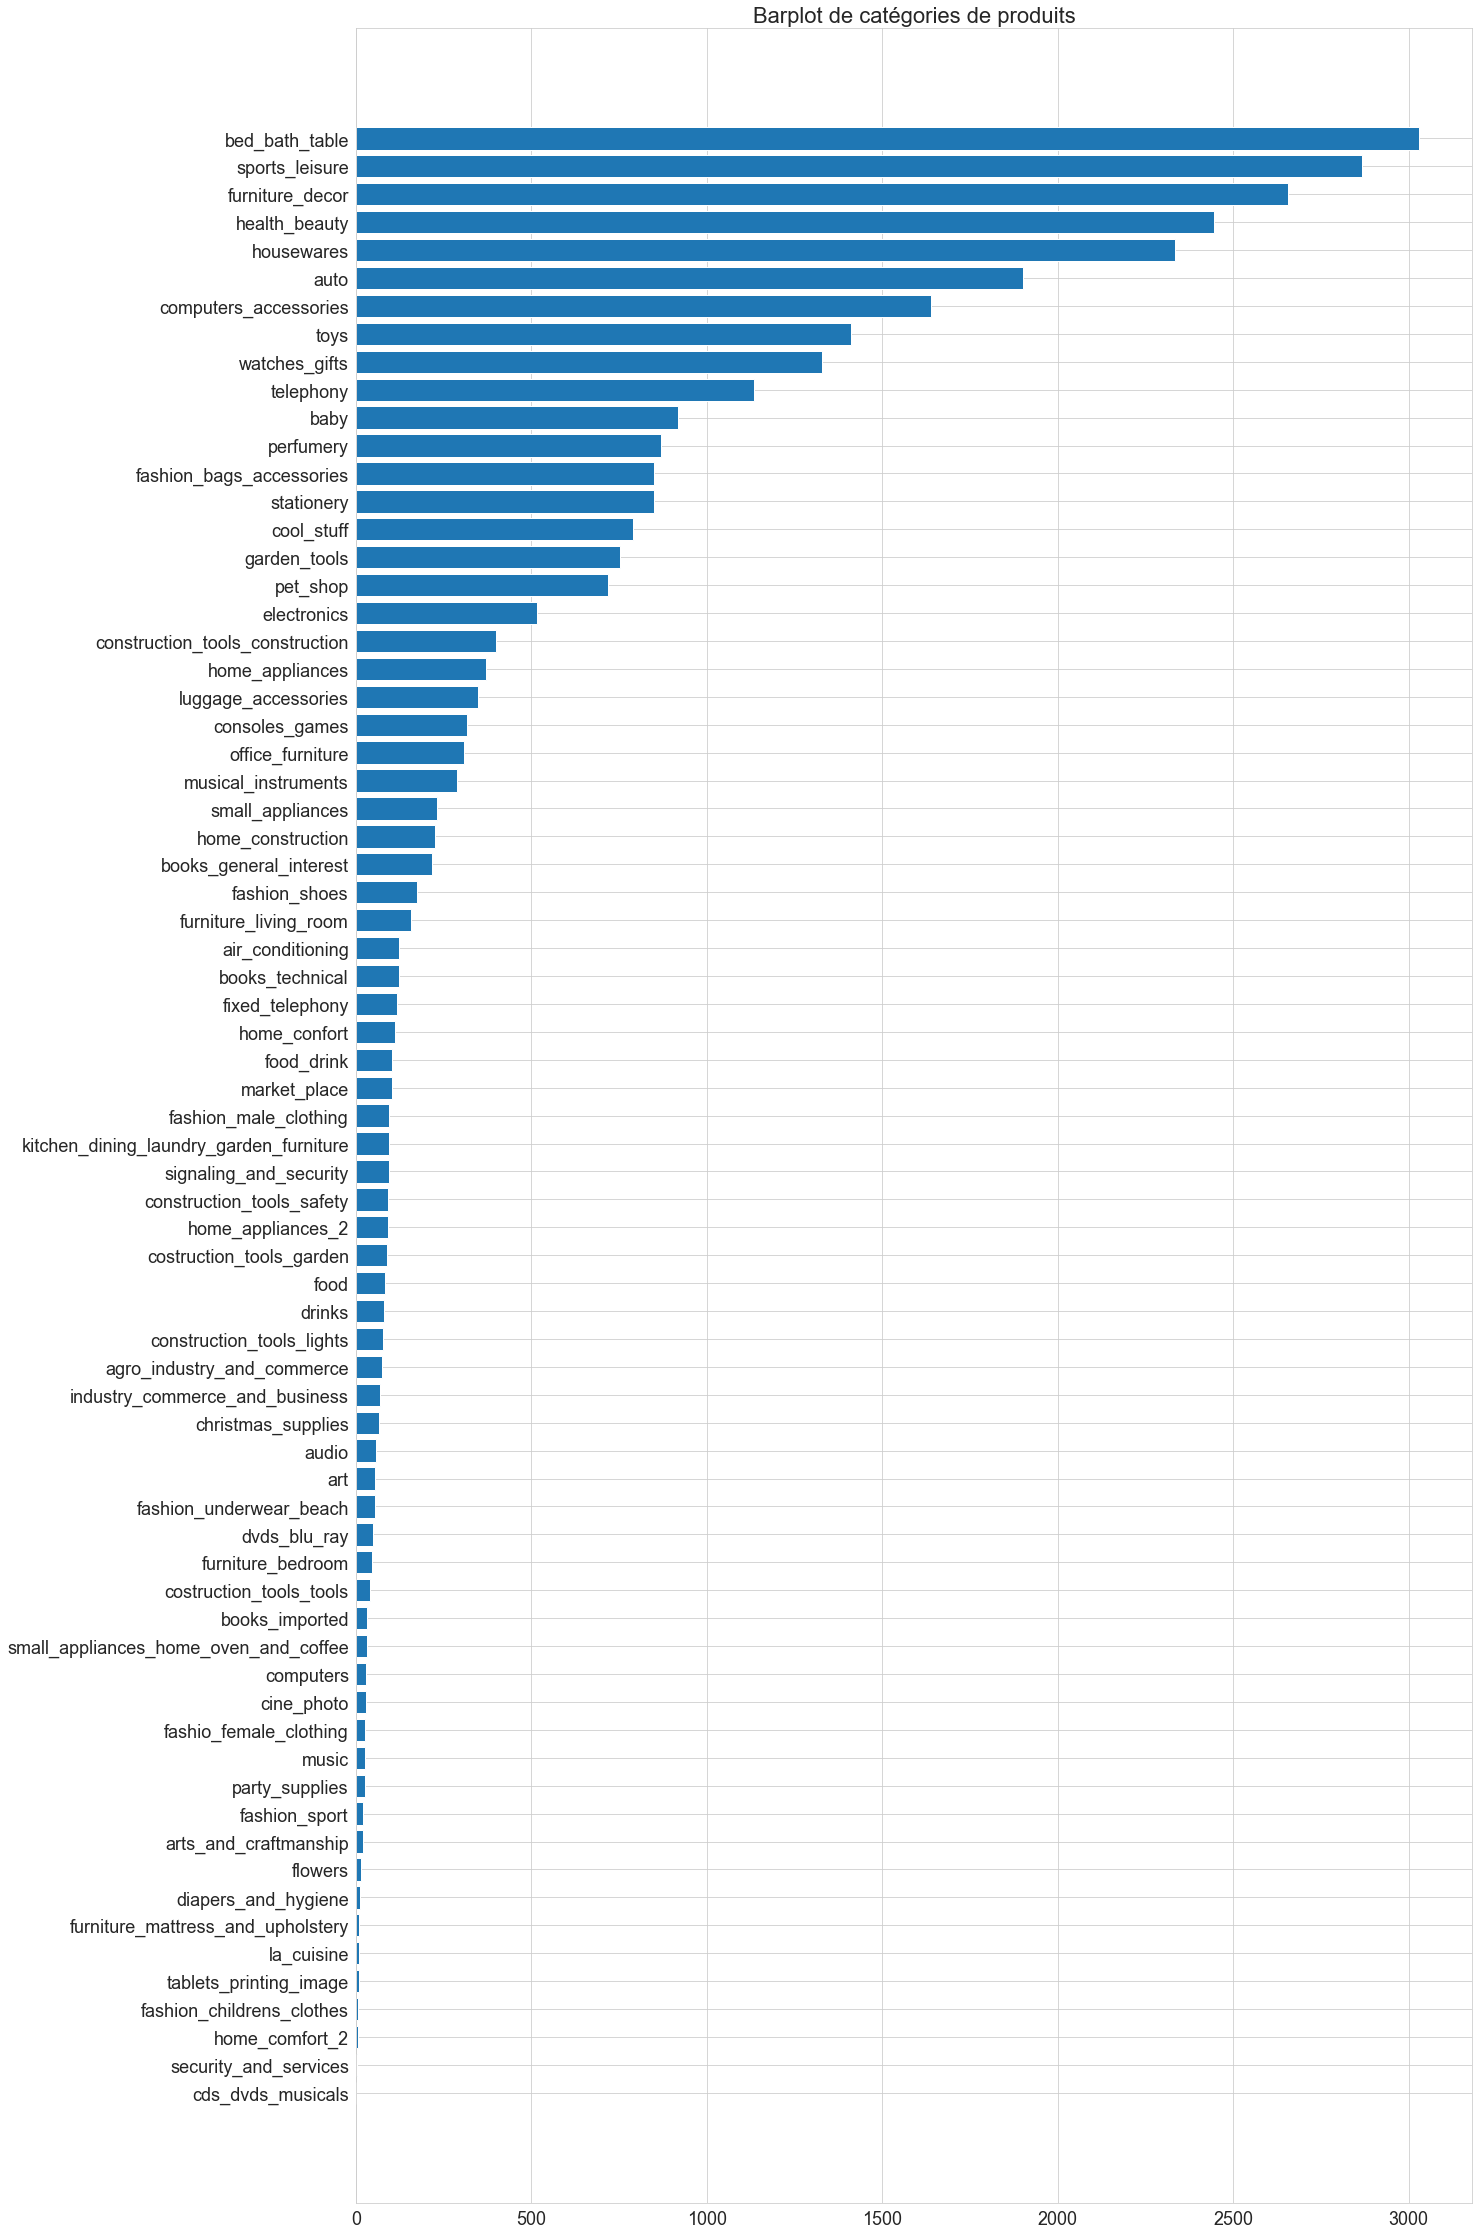

In [93]:
plt.figure()
fig = plt.figure(figsize=(20, 40))
# We define a fake subplot that is in fact only the plot
ax = fig.add_subplot(111)

plt.title("Barplot de catégories de produits", fontsize=22)
plt.barh(range(product_category.shape[0]),
         product_category['product_category_name_english'])
plt.yticks(range(product_category.shape[0]), product_category.index)
ax.tick_params(axis='both', which='major', labelsize=18)

Nous avons 72 catégories de produits.

#### Nombre de photos de produit

In [94]:
product_photos_qty = desc_quali(olist_products_dataset, 'product_photos_qty')
product_photos_qty

,product_photos_qty,Pourcentage
1.0,16489.0,50.98
2.0,6263.0,19.37
3.0,3860.0,11.94
4.0,2428.0,7.51
5.0,1484.0,4.59
6.0,968.0,2.99
7.0,343.0,1.06
8.0,192.0,0.59
9.0,105.0,0.32
10.0,95.0,0.29


<Figure size 864x864 with 0 Axes>

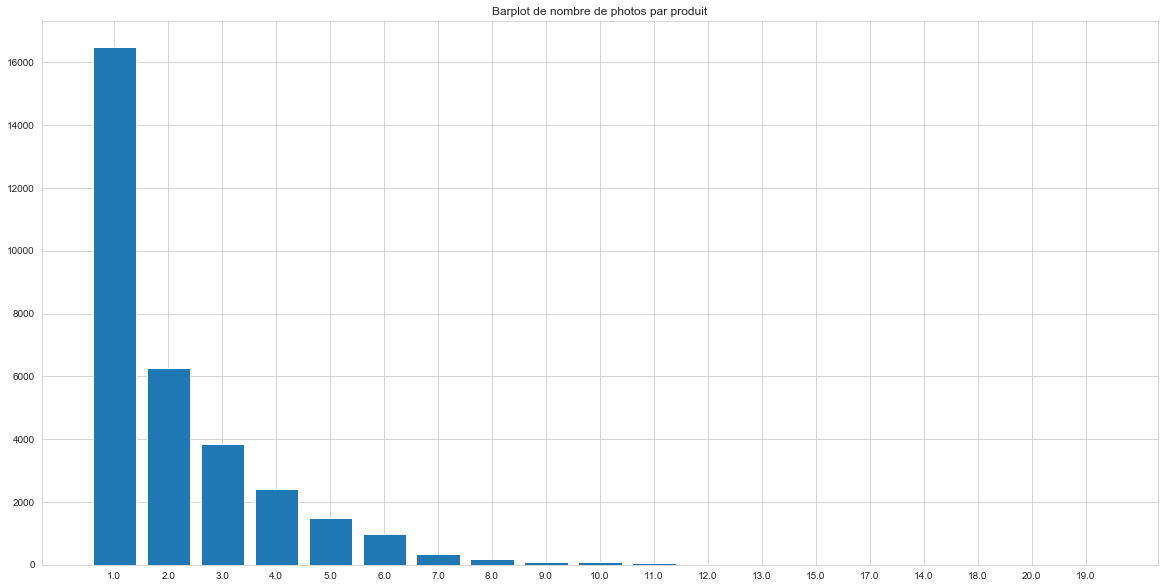

In [95]:
plot_bar_desc_quali(product_photos_qty, 'product_photos_qty',
                    "Barplot de nombre de photos par produit")

#### Poids et dimensions de produits

In [96]:
desc_quanti(olist_products_dataset, 'product_weight_g',
            'product_length_cm', 'product_height_cm', 'product_width_cm')

,count,mean,std,min,25%,50%,75%,max,NaN
product_weight_g,32949.0,2276.47,4282.04,0.0,300.0,700.0,1900.0,40425.0,2.0
product_length_cm,32949.0,30.82,16.91,7.0,18.0,25.0,38.0,105.0,2.0
product_height_cm,32949.0,16.94,13.64,2.0,8.0,13.0,21.0,105.0,2.0
product_width_cm,32949.0,23.20,12.08,6.0,15.0,20.0,30.0,118.0,2.0


C:\Users\Utilisateur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


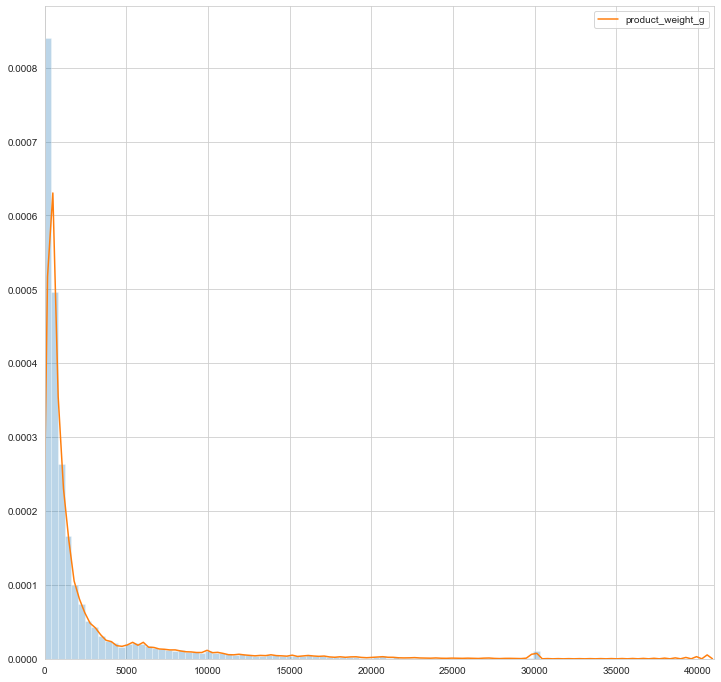

In [97]:
plt.hist(olist_products_dataset['product_weight_g'], alpha=0.3, range=(
    0, 41000),  bins=100, density=True)
sns.kdeplot(olist_products_dataset['product_weight_g'])

plt.xlim(0, 41000)
plt.rcParams['figure.figsize'] = (12, 12)

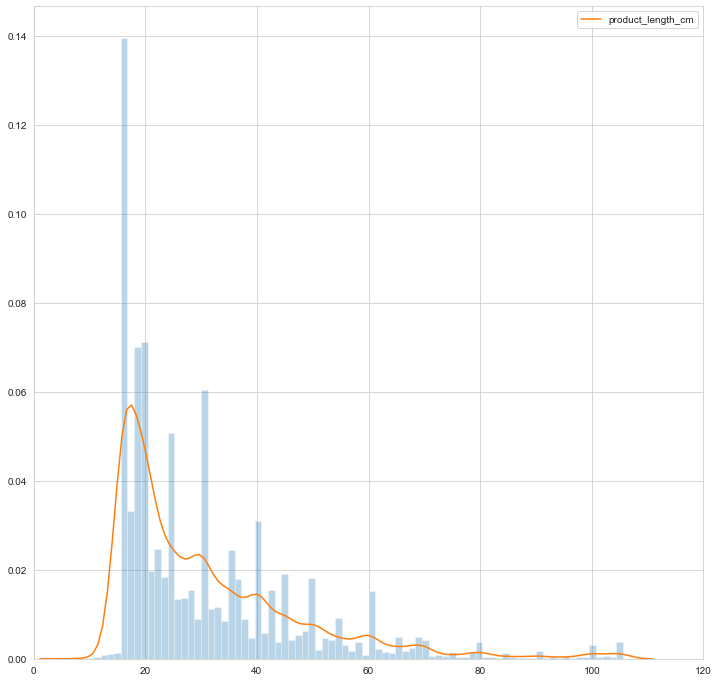

In [98]:
plt.hist(olist_products_dataset['product_length_cm'],
         alpha=0.3, range=(0, 120),  bins=100, density=True)
sns.kdeplot(olist_products_dataset['product_length_cm'])

plt.xlim(0, 120)
plt.rcParams['figure.figsize'] = (12, 12)

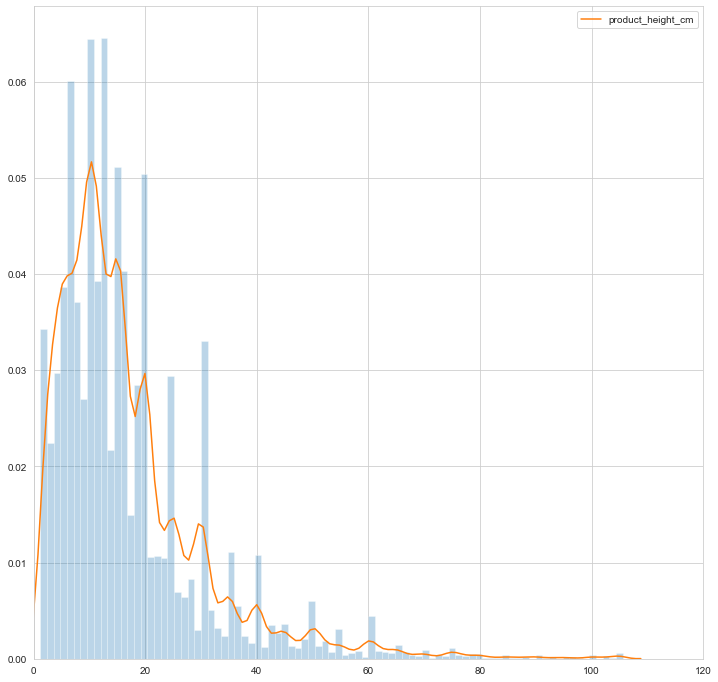

In [99]:
plt.hist(olist_products_dataset['product_height_cm'],
         alpha=0.3, range=(0, 120),  bins=100, density=True)
sns.kdeplot(olist_products_dataset['product_height_cm'])

plt.xlim(0, 120)
plt.rcParams['figure.figsize'] = (12, 12)

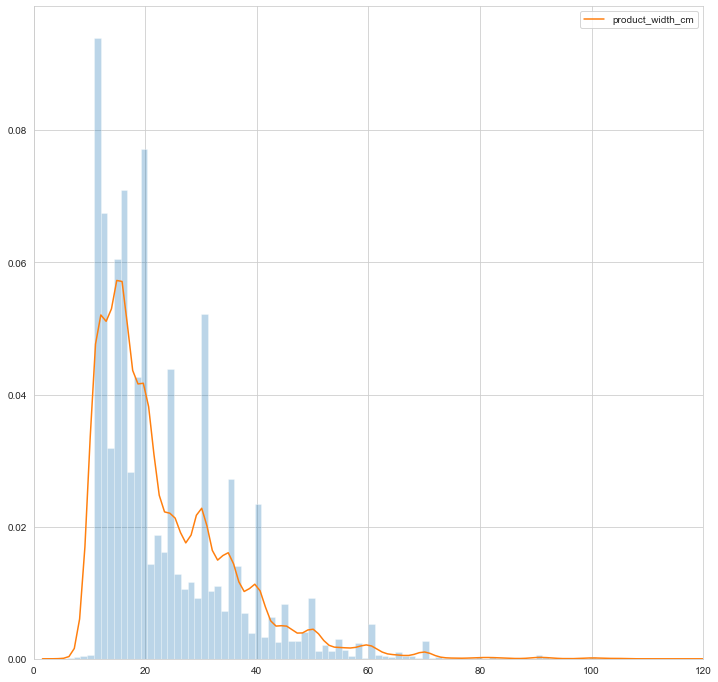

In [100]:
plt.hist(olist_products_dataset['product_width_cm'],
         alpha=0.3, range=(0, 120),  bins=100, density=True)
sns.kdeplot(olist_products_dataset['product_width_cm'])

plt.xlim(0, 120)
plt.rcParams['figure.figsize'] = (12, 12)

### 3.1.8 - Sellers Dataset

La table olist_sellers_dataset contient les variables suivantes :

- seller_id: seller unique identifier
- seller_zip_code_prefix: first 5 digits of seller zip code
- seller_city: seller city name
- seller_state: seller state

In [101]:
olist_sellers_dataset.shape

(3095, 4)

Nous avons 3 095 vendeurs uniques.

In [102]:
desc_quali(olist_sellers_dataset, 'seller_city')

,seller_city,Pourcentage
sao paulo,694.0,22.42
curitiba,127.0,4.10
rio de janeiro,96.0,3.10
belo horizonte,68.0,2.20
ribeirao preto,52.0,1.68
guarulhos,50.0,1.62
ibitinga,49.0,1.58
santo andre,45.0,1.45
campinas,41.0,1.32
maringa,40.0,1.29


La plupart de vendeurs (22%) vient de Sao Paolo.

In [103]:
desc_quali(olist_sellers_dataset, 'seller_state')

,seller_state,Pourcentage
SP,1849.0,59.74
PR,349.0,11.28
MG,244.0,7.88
SC,190.0,6.14
RJ,171.0,5.53
RS,129.0,4.17
GO,40.0,1.29
DF,30.0,0.97
ES,23.0,0.74
BA,19.0,0.61


## 3.2 - Création de variables agrégées et transformations de variables par table

Nous allons créer une table unique afin de pouvoir exploiter les features. 

Nous allons également créer des variable avec les valeurs moyens aggrégés par commande (exemple : la client peut payer avec plusieurs moyens de paiement. Order_id n'est donc pas unique. Nous allons créer une variable qui représente valeur moyen de paiement et qui est calculée comme moyen de tous les paiements par order_id).

### 3.2.1 Table payments

In [104]:
olist_order_payments_dataset['order_id'].nunique()

99440

In [105]:
olist_order_payments_dataset.shape

(103886, 5)

In [106]:
payments = olist_order_payments_dataset.sort_values(
    by=['order_id', 'payment_sequential'])

Nous allons d'abord créer plusieurs variables afin de pouvoir analyser le type de paiement :

- 1 variable binaire par type de paiement
- somme de chaque type de paiement par order id

In [107]:
payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

Les 3 valeurs "not_defined" vont être recodé en valeur modale "credit_card":

In [108]:
payments['payment_type'] = np.where(
    payments['payment_type'] == 'not_defined', 'credit_card', payments['payment_type'])

In [109]:
payments['payment_type'].value_counts()

credit_card    76798
boleto         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

In [110]:
payments = fonctions.transf_binaire_multiclass(payments, 'payment_type')

Nous allons calcules les variable aggrégées par order id :

In [111]:
payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'payment_type_credit_card',
       'payment_type_boleto', 'payment_type_voucher',
       'payment_type_debit_card'],
      dtype='object')

In [112]:
payments = fonctions.sum_id(payments, 'payment_type_credit_card', 'order_id')
payments = fonctions.sum_id(payments, 'payment_type_voucher', 'order_id')
payments = fonctions.sum_id(payments, 'payment_type_boleto', 'order_id')
payments = fonctions.sum_id(payments, 'payment_type_debit_card', 'order_id')
payments = fonctions.sum_id(payments, 'payment_value', 'order_id')
payments = fonctions.sum_id(payments, 'payment_installments', 'order_id')

In [113]:
payments = fonctions.mean_id(payments, 'payment_installments', 'order_id')

In [114]:
payments = fonctions.mean_id(payments, 'payment_value', 'order_id')

In [115]:
payments = fonctions.max_id(payments, 'payment_sequential', 'order_id')

In [116]:
payments = payments.drop(['payment_sequential', 'payment_type', 'payment_installments', 'payment_value',
                          'payment_type_credit_card', 'payment_type_boleto', 'payment_type_voucher',
                          'payment_type_debit_card'], axis=1)

In [117]:
payments.drop_duplicates(inplace=True)

In [118]:
payments.shape

(99440, 10)

Notre table contient 99440 observations (une ligne par order id). Les variables étaient recalculées comme :
- Moyen par commande : 
  - nombre d'échéances moyen
  - montant de paiement moyen
- Somme par commande : 
  - somme de valeur de paiements
  - somme d'échéances
- Nombre :
  - nombre de paiments pour chaque type de paiement
- Maximum :
  - Maximum de payment_sequentiel qui représente le nombre total de paiements pour chaque commande

### 3.2.2 Table review

In [119]:
olist_order_reviews_dataset['order_id'].nunique()

99441

In [120]:
olist_order_reviews_dataset['review_id'].nunique()

99173

In [121]:
any(olist_order_reviews_dataset['review_id'].duplicated())

True

In [122]:
any(olist_order_reviews_dataset['order_id'].duplicated())

True

In [123]:
olist_order_reviews_dataset.shape

(100000, 7)

Table contient 100 000 commentaires sur les 99 441 commandes qui figurent dans la BD. Nous avons parfois plusieurs commentaires par commande.

In [124]:
dupl_order_id = olist_order_reviews_dataset[olist_order_reviews_dataset['order_id'].duplicated(
)]

In [125]:
olist_order_reviews_dataset[olist_order_reviews_dataset['order_id']
                            == '5040757d4e06a4be96d3827b860b4e7c']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1035,afd9b3d196f0acd81d79d8ccd79c2430,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-10-31 00:00:00,2017-11-04 21:12:29
1128,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48


In [126]:
olist_order_items_dataset[olist_order_items_dataset['order_id']
                          == '5040757d4e06a4be96d3827b860b4e7c']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
35458,5040757d4e06a4be96d3827b860b4e7c,1,f80214fd7d681d1dcf12b3acaf4f0da7,7c67e1448b00f6e969d365cea6b010ab,2017-10-31 23:14:10,196.99,56.66


Nous pouvons avoir plusieurs commentaires même pour une commande avec 1 seul produit.

In [127]:
dupl_review_id = olist_order_reviews_dataset[olist_order_reviews_dataset['review_id'].duplicated(
)]

In [128]:
olist_order_reviews_dataset[olist_order_reviews_dataset['review_id']
                            == '308316408775d1600dad81bd3184556d']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
4574,308316408775d1600dad81bd3184556d,27e5ed2ecefbe0bcc9ae0c9b26b763c3,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09
5757,308316408775d1600dad81bd3184556d,3fe4dbcdb046a475dbf25463c1ca78bd,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09
54085,308316408775d1600dad81bd3184556d,8b3c2785144e72ccba9b0213f0f1cd1e,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09


Un commentaire peut être attribué aux plusieurs commandes.

Les deux clés review_id et order_id sont de type many-to-many, c'est à dire que l'on peut avoir plusieurs reviens par commande et plusieurs commandes par review.

Nous allons merger la table avec order_id. S'il y a plusieurs reviews par order_id, il faudra calculer le valeurs moyennes.

Nous allons créer les variables suivantes :

- review_id_size : nombre de reviews par commande
- review_score_mean : score moyen par commande (si plusieurs reviews)
- comment_title_sum : nombre de titres de commentaire rempli par commande
- comment_message_sum : nombre de commentaires rempli par commande
- review_delay_min : délais de la première réponse à l'enquête (si plusieures réponses)
- review_delay_max : délais de la dernière réponse à l'enquête (si plusieures réponses)

In [129]:
reviews = fonctions.size_id(
    olist_order_reviews_dataset, 'review_id', 'order_id')

In [130]:
reviews = fonctions.mean_id(reviews, 'review_score', 'order_id')

In [131]:
reviews = fonctions.transf_binaire(
    reviews, reviews['review_comment_title'].isna() == False, 'comment_title')

In [132]:
reviews = fonctions.sum_id(reviews, 'comment_title', 'order_id')

In [133]:
reviews = fonctions.transf_binaire(
    reviews, reviews['review_comment_message'].isna() == False, 'comment_message')
reviews = fonctions.sum_id(reviews, 'comment_message', 'order_id')

In [134]:
# Converting to datetime
reviews['review_answer_timestamp'] = pd.to_datetime(
    reviews.review_answer_timestamp)
reviews['review_creation_date'] = pd.to_datetime(reviews.review_creation_date)
reviews['reviews_delay'] = reviews['review_answer_timestamp'] - \
    reviews['review_creation_date']

In [135]:
reviews = fonctions.min_id(reviews, 'reviews_delay', 'order_id')
reviews = fonctions.max_id(reviews, 'reviews_delay', 'order_id')

In [136]:
reviews.drop(['review_id', 'review_score', 'review_comment_title', 'review_comment_message', 
              'review_creation_date',
              'review_answer_timestamp', 'comment_title', 'comment_message', 'reviews_delay'],
             axis=1, inplace=True)

In [137]:
reviews.columns

Index(['order_id', 'review_id_size', 'review_score_mean', 'comment_title_sum',
       'comment_message_sum', 'reviews_delay_min', 'reviews_delay_max'],
      dtype='object')

In [138]:
reviews.drop_duplicates(inplace=True)

In [139]:
reviews.shape

(99441, 7)

### 3.2.3 Table sellers

In [140]:
olist_sellers_dataset['seller_id'].nunique()

3095

In [141]:
olist_sellers_dataset.shape

(3095, 4)

Pas besoin de préparer le tableau, nous pouvons merger directement avec Order Items.

### 3.2.4 Table order items

In [142]:
olist_order_items_dataset.shape

(112650, 7)

In [143]:
order_items = olist_order_items_dataset.copy()

In [144]:
# Converting to datetime
order_items['shipping_limit_date'] = pd.to_datetime(
    order_items.shipping_limit_date)

In [145]:
any(order_items.duplicated('order_id'))

True

### 3.2.5 Table orders

In [146]:
# Creating a copy
orders = olist_orders_dataset.copy()

In [147]:
olist_orders_dataset.shape

(99441, 8)

In [148]:
# Converting to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(
    orders.order_purchase_timestamp)
orders['order_approved_at'] = pd.to_datetime(orders.order_approved_at)
orders['order_delivered_carrier_date'] = pd.to_datetime(
    orders.order_delivered_carrier_date)
orders['order_delivered_customer_date'] = pd.to_datetime(
    orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(
    orders.order_estimated_delivery_date)

### 3.2.5 Table geolocation

In [149]:
geolocation = olist_geolocation_dataset.rename(
    {'geolocation_zip_code_prefix': 'zip_code_prefix'}, axis=1)

In [150]:
any(geolocation.duplicated('zip_code_prefix'))

True

In [151]:
geolocation.columns

Index(['zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

Nous souhaitons avoir un code ZIP unique pour pouvoir merger avec les données de clients.

In [152]:
geolocation.drop(['geolocation_city', 'geolocation_state'],
                 axis=1, inplace=True)

In [153]:
geolocation.shape

(1000163, 3)

In [154]:
geolocation.drop_duplicates(inplace=True)

In [155]:
geolocation.shape

(720154, 3)

In [156]:
any(geolocation.duplicated('zip_code_prefix'))

True

La clé de géolocalisation n'est pas unique, même si on prend en compte seulement les variables latitude et longitude. En même temps, ces données n'ont pas un grand intérêt pour notre projet, étant donné que nous avons déjà deux variables qui expriment la position géographique des clients : city et state. Le plus value de la table geolocation n'est donc pas trop élevée. 

### 3.2.6 Table customers

In [157]:
customers = olist_customers_dataset.copy()

## 3.3 Fusion de tables 

### 3.3.1 Fusion de table orders avec reviews et payments

In [158]:
orders = orders.merge(reviews, on='order_id', how='left')

In [159]:
orders = orders.merge(payments, on='order_id', how='left')

### 3.3.2 Fusion de table Order Items avec Sellers et Products

In [160]:
order_items = olist_order_items_dataset.merge(
    olist_products_dataset, how='left', on='product_id')

In [161]:
order_items = order_items.merge(
    olist_sellers_dataset, how='left', on='seller_id')

In [162]:
any(order_items.duplicated('order_id'))

True

### 3.3.3 Fusion finale

In [163]:
customers.shape

(99441, 5)

In [164]:
any(customers.duplicated('customer_id'))

False

In [165]:
orders.shape

(99441, 23)

In [166]:
any(orders.duplicated('customer_id'))

False

La clé customer_id est unique dans les deux tables orders et customers. Nous pouvons donc fusionner les tables à l'aide de code suivant :  

In [167]:
customers = customers.merge(orders, on='customer_id')

In [168]:
customers.shape

(99441, 27)

In [169]:
order_items.shape

(112650, 19)

In [170]:
customers = customers.merge(order_items, on='order_id')

In [171]:
customers.shape

(112650, 45)

In [172]:
any(customers.duplicated('customer_unique_id'))

True

In [173]:
customers['product_category_name_english'].nunique()

71

### 3.3.4 Analyse descriptive - nombre de clients, commandes et produits

Nombre de produits achetés :

In [174]:
customers.shape

(112650, 45)

Nombre de clients : 

In [175]:
customers['customer_unique_id'].nunique()

95420

Nombre de produits uniques :

In [176]:
customers['product_id'].nunique()

32951

Nombre de commandes : 

In [177]:
customers['order_id'].nunique()

98666

Maximum de produits achatés par 1 client :

In [178]:
group = customers['product_id'].groupby(customers['customer_unique_id'])
temp = group.size()

In [179]:
max(temp)

24

Le maximum est 24 produits par client.

Nombre de produits achatés par des clients :

In [180]:
temp.value_counts()

1     83551
2      8996
3      1672
4       632
5       254
6       198
7        46
8        16
9        11
10       11
11       11
12        9
14        3
13        2
15        2
20        2
21        1
16        1
18        1
24        1
Name: product_id, dtype: int64

Nous pouvons voir que la plupart de clients ont achété un seul produit.

Nombre de commandes par client :

In [181]:
group = customers['order_id'].groupby(customers['customer_unique_id'])
temp = group.size()

In [182]:
max(temp)

24

In [389]:
temp_plot = DataFrame(temp.value_counts())
temp_plot.rename({'order_id': 'Nombre de clients'}, axis=1, inplace=True)
temp_plot.sort_index(inplace=True)
temp_plot.index.name = 'Nombre de produits'

In [390]:
temp_plot['Pourcentage'] = round(temp_plot['Nombre de clients']*100/data.shape[0],2)

In [391]:
temp_plot

,Nombre de clients,Pourcentage
Nombre de produits,,
1,83551,87.56
2,8996,9.43
3,1672,1.75
4,632,0.66
5,254,0.27
6,198,0.21
7,46,0.05
8,16,0.02
9,11,0.01


Text(0, 0.5, 'Nombre de clients')

<Figure size 864x864 with 0 Axes>

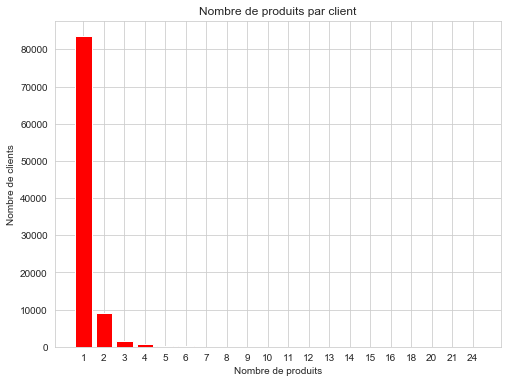

In [184]:
plt.figure()
fig = plt.figure(figsize=(8, 6))
plt.title('Nombre de produits par client')
plt.bar(range(temp_plot.shape[0]), temp_plot['Nombre de clients'], color="red")
plt.xticks(range(temp_plot.shape[0]), temp_plot.index)
plt.xlabel('Nombre de produits')
plt.ylabel('Nombre de clients')

In [185]:
categories = customers['product_category_name_english'].value_counts()

Nous allons exporter la table finale en csv afin de pouvoir facilement explorer les features :

In [186]:
customers.to_csv('Data/customers.csv', sep='\t')

In [187]:
categories.to_csv('Data/categories.csv', sep='\t')

C:\Users\Utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


Nous allons enlever les variables qui n'apportent pas beaucoup d'information.

In [188]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id_size', 'review_score_mean',
       'comment_title_sum', 'comment_message_sum', 'reviews_delay_min',
       'reviews_delay_max', 'payment_type_credit_card_sum',
       'payment_type_voucher_sum', 'payment_type_boleto_sum',
       'payment_type_debit_card_sum', 'payment_value_sum',
       'payment_installments_sum', 'payment_installments_mean',
       'payment_value_mean', 'payment_sequential_max', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_c

In [189]:
data = customers.drop(['customer_id', 'order_status', 'order_approved_at', 'order_delivered_carrier_date',
                       'order_estimated_delivery_date', 'payment_value_mean', 'shipping_limit_date', 'product_category_name',
                       'product_name_lenght', 'order_delivered_customer_date',
                       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                       'product_length_cm', 'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
                       'seller_city', 'seller_state'], axis=1)

In [190]:
data.shape

(112650, 26)

## 3.4 Création de features finales 

Le but est de créer un DataFrame avec 1 ligne par client (customer_unique_id). La transformation de features sera faite de manière suivante :

- order_id :
    - num_orders : Nombre de commandes effectuées par le client
    

- order_purchase_timestamp :
    - order_purchase_timestamp_min : date de première commande
    - order_purchase_timestamp_max : date de dernière commande
    - delay_last_order : nombre de jours depuis la dernière commande
    
    
- review_id_size : nombre de reviews laissé par le client par commande
    - review_id_size_mean => variable sera renommée en num_reviews_mean : nombre moyen de reviews par commande
    
    
- review_score_mean : score moyen laissé par client par commande
    - review_score_mean_mean => variable sera renommée en review_score_mean
    
    
- comment_title_sum : Nombre de titres de commentaire laissé par le client par commande
    - comment_title_sum_mean => variable sera renommée en num_comment_title_mean
    
    
- comment_message_sum : Nombre de commentaire laissé par le client par commande  
    - comment_message_sum_mean => variable sera renommée en num_comment_message_mean
    
    
- review_delay_min : Délais minimale de réponse à l'enquête de satisfaction par commande
    - review_delay_min_min => sera renommé en review_delay_min : délais minimale de réponse
    
    
- review_delay_max : Délais maximale de réponse à l'enquête de satisfaction par commande
    - review_delay_max_max => sera renommé en review_delay_max : délais maximale de réponse
    

- payment_type_credit_card_sum : nombre de paiements par carte de crédit pas commande
    - payment_type_credit_card_sum_sum => sera renommé en num_payment_type_credit_card
    - payment_type_credit_card_mean => calculé comme nombre de paiements par CB en moyen par commande    (payment_type_credit_card_sum/nombre de commandes)

- Les autres variables de type de paiement seront traitées de la même manière. Il s'agit de variables :
    - payment_type_voucher_card_sum
    - payment_type_boleto_card_sum
    - payment_type_debit_card_sum
    
   
- payment_value_sum : prix de la commande
    - payement_value_sum_mean => sera renomé en order_value_mean


- payment_installements_sum : nombre d'échéances par commande
    - payment_installements_sum_min => sera renommé en installements_per_order_min : nombre minimal d'échéances par commande
    - payment_installements_sum_max => sera renommé en installements_per_order_max : nombre maximal d'échéances par commande
    
    
- payment_installements_mean : nombre moyen d'échéances par paiement
    - payment_installements_mean_mean => sera renommé en installements_per_order_mean : nombre moyen d'échéances par commande
    
 
- payment_sequential_max : le nombre de paiements par commande
    - payment_sequential_max_mean => sera renommé en num_paiements_per_order_mean
    - payment_sequential_max_min => sera renommé en num_paiements_per_order_min
    - payment_sequential_max_max => sera renommé en num_paiements_per_order_max
    
    
- order_item_id : séquence qui est incrémentée si le même produit figure sur la commande plusieurs fois
    - order_item_id_max : sera renommé en quantity_of_products
    
 
- product_id :
    - num_products_per_order_min : Nombre min de produits par commande
    - num_products_per_order_max : Nombre max de produits par commande
    - num_products_per_order_mean : Nombre moyen de produits par commande
    - num_products : Nombre de produits commandés par le client 


- seller_id : 
    - num_sellers : nombre de vendeur différents
    
    
- price :
    - price_min : le prix minimal de produits achetés
    - price_max : le prix maximal de produits achetés
    - price_mean : le prix moyen de produits achetés
    
    
- freight_value :
    - freight_valu_min : le minimum de frais de livraison
    - freight_valu_max : le maximum de frais de livraison
    - freight_valu_mean : le moyen de frais de livraison
    
- product_category_name_english - variable sera recodée de la manière suivante :
    1. Réduction de nombre de classe (initialement 71) : regroupement de classes similaires, élimination de classes avec peu d'effectifs
    2. Création d'une variable par classe contenant nombre de produits commandé par le client dans la classe
    



    
    
 
    
    

    


In [191]:
data.columns

Index(['customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_id', 'order_purchase_timestamp',
       'review_id_size', 'review_score_mean', 'comment_title_sum',
       'comment_message_sum', 'reviews_delay_min', 'reviews_delay_max',
       'payment_type_credit_card_sum', 'payment_type_voucher_sum',
       'payment_type_boleto_sum', 'payment_type_debit_card_sum',
       'payment_value_sum', 'payment_installments_sum',
       'payment_installments_mean', 'payment_sequential_max', 'order_item_id',
       'product_id', 'seller_id', 'price', 'freight_value',
       'product_category_name_english'],
      dtype='object')

Tout d'abord, nous allons créer les variables aggrégées par commande et par produit => le but est de réduire le 'order_id' en clé unique.

#### order_purchase_timestamp_min

In [192]:
data = fonctions.min_id(data, 'order_purchase_timestamp', 'customer_unique_id')

In [193]:
# Vérification
data['order_purchase_timestamp_min'][data['customer_unique_id']
                                     == '004288347e5e88a27ded2bb23747066c']

22765   2017-07-27 14:13:03
25065   2017-07-27 14:13:03
Name: order_purchase_timestamp_min, dtype: datetime64[ns]

#### order_purchase_timestamp_max

In [194]:
data = fonctions.max_id(data, 'order_purchase_timestamp', 'customer_unique_id')

In [195]:
# Vérification
data['order_purchase_timestamp_max'][data['customer_unique_id']
                                     == '004288347e5e88a27ded2bb23747066c']

22765   2018-01-14 07:36:54
25065   2018-01-14 07:36:54
Name: order_purchase_timestamp_max, dtype: datetime64[ns]

#### delay_last_order

In [196]:
data['order_purchase_timestamp_max_dt'] = data['order_purchase_timestamp_max'].apply(
    lambda x: pd.to_datetime(str(x)))

In [197]:
data['delay_last_order'] = data['order_purchase_timestamp_max_dt'].apply(
    lambda x: (datetime.datetime.now() - x).days)

#### delay_first_order

In [198]:
data['order_purchase_timestamp_min_dt'] = data['order_purchase_timestamp_min'].apply(
    lambda x: pd.to_datetime(str(x)))

In [199]:
data['delay_first_order'] = data['order_purchase_timestamp_min_dt'].apply(
    lambda x: (datetime.datetime.now() - x).days)

#### num_reviews_mean

In [200]:
data = fonctions.mean_id(data, 'review_id_size', 'customer_unique_id')
data.rename(columns={'review_id_size_mean': 'num_reviews_mean'}, inplace=True)

In [201]:
# Vérification
data['num_reviews_mean'][data['customer_unique_id']
                         == '004288347e5e88a27ded2bb23747066c']

22765    1.0
25065    1.0
Name: num_reviews_mean, dtype: float64

#### review_score_mean_per_order

In [202]:
data = fonctions.mean_id(data, 'review_score_mean', 'customer_unique_id')
data.rename(
    columns={'review_score_mean_mean': 'review_score_mean_per_order'}, inplace=True)

In [203]:
# Vérification
data['review_score_mean_per_order'][data['customer_unique_id']
                                    == '004288347e5e88a27ded2bb23747066c']

22765    5.0
25065    5.0
Name: review_score_mean_per_order, dtype: float64

#### num_comment_title_mean

In [204]:
data = fonctions.mean_id(data, 'comment_title_sum', 'customer_unique_id')
data.rename(
    columns={'comment_title_sum_mean': 'num_comment_title_mean'}, inplace=True)

In [205]:
# Vérification
data['num_comment_title_mean'][data['customer_unique_id']
                               == '004288347e5e88a27ded2bb23747066c']

22765    0.0
25065    0.0
Name: num_comment_title_mean, dtype: float64

#### comment_message_sum_mean 

In [206]:
data = fonctions.mean_id(data, 'comment_message_sum', 'customer_unique_id')
data.rename(
    columns={'comment_message_sum_mean': 'num_comment_message_mean'}, inplace=True)

In [207]:
# Vérification
data['num_comment_message_mean'][data['customer_unique_id']
                                 == '004288347e5e88a27ded2bb23747066c']

22765    1.0
25065    1.0
Name: num_comment_message_mean, dtype: float64

#### review_delay_min_days 

In [208]:
data = fonctions.min_id(data, 'reviews_delay_min', 'customer_unique_id')
data.rename(
    columns={'reviews_delay_min_min': 'review_delay_min_per_order'}, inplace=True)

In [209]:
data['review_delay_min_days'] = data['review_delay_min_per_order'].apply(
    lambda x: x.days)

In [210]:
data['review_delay_min_days'][data['customer_unique_id']
                              == '004288347e5e88a27ded2bb23747066c']

22765    1
25065    1
Name: review_delay_min_days, dtype: int64

#### review_delay_max_days 

In [211]:
data = fonctions.max_id(data, 'reviews_delay_max', 'customer_unique_id')
data.rename(
    columns={'reviews_delay_max_max': 'review_delay_max_per_order'}, inplace=True)

In [212]:
data['review_delay_max_days'] = data['review_delay_max_per_order'].apply(
    lambda x: x.days)

In [213]:
data['review_delay_max_days'][data['customer_unique_id']
                              == '004288347e5e88a27ded2bb23747066c']

22765    1
25065    1
Name: review_delay_max_days, dtype: int64

#### num_payment_type_credit_card

In [214]:
data = fonctions.sum_id(
    data, 'payment_type_credit_card_sum', 'customer_unique_id')
data.rename(columns={
            'payment_type_credit_card_sum_sum': 'num_payment_type_credit_card'}, inplace=True)

In [215]:
# Vérification
data['num_payment_type_credit_card'][data['customer_unique_id']
                                     == '004288347e5e88a27ded2bb23747066c']

22765    2.0
25065    2.0
Name: num_payment_type_credit_card, dtype: float64

#### num_payment_type_voucher

In [216]:
data = fonctions.sum_id(data, 'payment_type_voucher_sum', 'customer_unique_id')
data.rename(columns={
            'payment_type_voucher_sum_sum': 'num_payment_type_voucher'}, inplace=True)

In [217]:
# Vérification
data['num_payment_type_voucher'][data['customer_unique_id']
                                 == '004288347e5e88a27ded2bb23747066c']

22765    0.0
25065    0.0
Name: num_payment_type_voucher, dtype: float64

#### num_payment_type_boleto

In [218]:
data = fonctions.sum_id(data, 'payment_type_boleto_sum', 'customer_unique_id')
data.rename(
    columns={'payment_type_boleto_sum_sum': 'num_payment_type_boleto'}, inplace=True)

In [219]:
# Vérification
data['num_payment_type_boleto'][data['customer_unique_id']
                                == '004288347e5e88a27ded2bb23747066c']

22765    0.0
25065    0.0
Name: num_payment_type_boleto, dtype: float64

#### num_payment_type_debit_card

In [220]:
data = fonctions.sum_id(
    data, 'payment_type_debit_card_sum', 'customer_unique_id')
data.rename(columns={
            'payment_type_debit_card_sum_sum': 'num_payment_type_debit_card'}, inplace=True)

In [221]:
# Vérification
data['num_payment_type_debit_card'][data['customer_unique_id']
                                    == '004288347e5e88a27ded2bb23747066c']

22765    0.0
25065    0.0
Name: num_payment_type_debit_card, dtype: float64

#### order_value_mean

In [222]:
data = fonctions.mean_id(data, 'payment_value_sum', 'customer_unique_id')
data.rename(
    columns={'payment_value_sum_mean': 'order_value_mean'}, inplace=True)

In [223]:
# Vérification
data['order_value_mean'][data['customer_unique_id']
                         == '004288347e5e88a27ded2bb23747066c']

22765    177.185
25065    177.185
Name: order_value_mean, dtype: float64

#### installements_per_order_mean 

In [224]:
data = fonctions.mean_id(
    data, 'payment_installments_mean', 'customer_unique_id')
data.rename(columns={
            'payment_installments_mean_mean': 'installments_per_order_mean'}, inplace=True)

In [225]:
# Vérification
data['installments_per_order_mean'][data['customer_unique_id']
                                    == '004288347e5e88a27ded2bb23747066c']

22765    2.0
25065    2.0
Name: installments_per_order_mean, dtype: float64

#### installements_per_order_min 

In [226]:
data = fonctions.min_id(data, 'payment_installments_sum', 'customer_unique_id')
data.rename(columns={
            'payment_installments_sum_min': 'installments_per_order_min'}, inplace=True)

In [227]:
# Vérification
data['installments_per_order_min'][data['customer_unique_id']
                                   == '004288347e5e88a27ded2bb23747066c']

22765    2.0
25065    2.0
Name: installments_per_order_min, dtype: float64

#### installements_per_order_max

In [228]:
data = fonctions.max_id(data, 'payment_installments_sum', 'customer_unique_id')
data.rename(columns={
            'payment_installments_sum_max': 'installments_per_order_max'}, inplace=True)

In [229]:
# Vérification
data['installments_per_order_max'][data['customer_unique_id']
                                   == '004288347e5e88a27ded2bb23747066c']

22765    2.0
25065    2.0
Name: installments_per_order_max, dtype: float64

#### num_paiements_per_order_mean

In [230]:
data = fonctions.mean_id(data, 'payment_sequential_max', 'customer_unique_id')
data.rename(columns={
            'payment_sequential_max_mean': 'num_paiements_per_order_mean'}, inplace=True)

In [231]:
# Vérification
data['num_paiements_per_order_mean'][data['customer_unique_id']
                                     == '004288347e5e88a27ded2bb23747066c']

22765    1.0
25065    1.0
Name: num_paiements_per_order_mean, dtype: float64

#### num_paiements_per_order_min

In [232]:
data = fonctions.min_id(data, 'payment_sequential_max', 'customer_unique_id')
data.rename(columns={
            'payment_sequential_max_min': 'num_paiements_per_order_min'}, inplace=True)

In [233]:
# Vérification
data['num_paiements_per_order_min'][data['customer_unique_id']
                                    == '004288347e5e88a27ded2bb23747066c']

22765    1.0
25065    1.0
Name: num_paiements_per_order_min, dtype: float64

#### num_paiements_per_order_max

In [234]:
data = fonctions.max_id(data, 'payment_sequential_max', 'customer_unique_id')
data.rename(columns={
            'payment_sequential_max_max': 'num_paiements_per_order_max'}, inplace=True)

In [235]:
# Vérification
data['num_paiements_per_order_max'][data['customer_unique_id']
                                    == '004288347e5e88a27ded2bb23747066c']

22765    1.0
25065    1.0
Name: num_paiements_per_order_max, dtype: float64

#### product_id_size

In [236]:
data = fonctions.size_id(data, 'product_id', 'order_id')

In [237]:
# Vérification
data['product_id_size'][data['order_id'] == '6b3b2c21c6f15b7203c8bb1283c74569']

99561    2
99562    2
Name: product_id_size, dtype: int64

#### num_products_per_order_min 

In [238]:
data = fonctions.min_id(data, 'product_id_size', 'customer_unique_id')
data.rename(
    columns={'product_id_size_min': 'num_products_per_order_min'}, inplace=True)

In [239]:
# Vérification
data['num_products_per_order_min'][data['customer_unique_id']
                                   == '011b4adcd54683b480c4d841250a987f']

102140    1
102141    1
109294    1
Name: num_products_per_order_min, dtype: int64

#### num_products_per_order_max 

In [240]:
data = fonctions.max_id(data, 'product_id_size', 'customer_unique_id')
data.rename(
    columns={'product_id_size_max': 'num_products_per_order_max'}, inplace=True)

In [241]:
# Vérification
data['num_products_per_order_max'][data['customer_unique_id']
                                   == '011b4adcd54683b480c4d841250a987f']

102140    2
102141    2
109294    2
Name: num_products_per_order_max, dtype: int64

#### num_products

In [242]:
data = fonctions.size_id(data, 'product_id_size', 'customer_unique_id')
data.rename(columns={'product_id_size_size': 'num_products'}, inplace=True)

In [243]:
# Vérification
data['num_products'][data['customer_unique_id']
                     == '011b4adcd54683b480c4d841250a987f']

102140    3
102141    3
109294    3
Name: num_products, dtype: int64

#### num_sellers

In [244]:
# To count the number of sellers, we should do an equivalent of "count distinct" in SQL :
grp = data.groupby('customer_unique_id').seller_id.nunique()

In [245]:
grp = DataFrame(grp)
grp.rename({'seller_id': 'num_sellers'}, axis=1, inplace=True)

In [246]:
data.shape

(112650, 55)

In [247]:
data = data.merge(grp, how='left', on='customer_unique_id')

In [248]:
data.shape

(112650, 56)

In [249]:
# Vérification
data['num_sellers'][data['customer_unique_id']
                    == '011b4adcd54683b480c4d841250a987f']

102140    2
102141    2
109294    2
Name: num_sellers, dtype: int64

#### price_min

In [250]:
data = fonctions.min_id(data, 'price', 'customer_unique_id')

In [251]:
# Verification
data['price_min'][data['customer_unique_id']
                  == '000fbf0473c10fc1ab6f8d2d286ce20c']

2709    23.03
2710    23.03
2711    23.03
2712    23.03
Name: price_min, dtype: float64

#### price_max

In [252]:
data = fonctions.max_id(data, 'price', 'customer_unique_id')

In [253]:
# Verification
data['price_max'][data['customer_unique_id']
                  == '000fbf0473c10fc1ab6f8d2d286ce20c']

2709    119.87
2710    119.87
2711    119.87
2712    119.87
Name: price_max, dtype: float64

#### price_mean

In [254]:
data = fonctions.mean_id(data, 'price', 'customer_unique_id')

In [255]:
# Verification
data['price_mean'][data['customer_unique_id']
                   == '000fbf0473c10fc1ab6f8d2d286ce20c']

2709    71.45
2710    71.45
2711    71.45
2712    71.45
Name: price_mean, dtype: float64

#### freight_value_min

In [256]:
data = fonctions.min_id(data, 'freight_value', 'customer_unique_id')

In [257]:
# Verification
data['freight_value_min'][data['customer_unique_id']
                          == '000fbf0473c10fc1ab6f8d2d286ce20c']

2709    19.14
2710    19.14
2711    19.14
2712    19.14
Name: freight_value_min, dtype: float64

#### freight_value_max

In [258]:
data = fonctions.max_id(data, 'freight_value', 'customer_unique_id')

In [259]:
# Verification
data['freight_value_max'][data['customer_unique_id']
                          == '000fbf0473c10fc1ab6f8d2d286ce20c']

2709    19.14
2710    19.14
2711    19.14
2712    19.14
Name: freight_value_max, dtype: float64

#### freight_value_mean

In [260]:
data = fonctions.mean_id(data, 'freight_value', 'customer_unique_id')

In [261]:
# Check
data['freight_value_mean'][data['customer_unique_id']
                           == '000fbf0473c10fc1ab6f8d2d286ce20c']

2709    19.14
2710    19.14
2711    19.14
2712    19.14
Name: freight_value_mean, dtype: float64

#### product_category

In [262]:
# Create a list of classes to aggregate
art_film_music_class = ['musical_instruments', 'art', 'dvds_blu_ray',
                        'music', 'arts_and_craftmanship', 'cds_dvds_musicals']

In [263]:
# Create new feature
data['category_art_film_music'] = np.where(
    data['product_category_name_english'].isin(art_film_music_class), 1, 0)

In [264]:
# Check
sum(data['category_art_film_music'])

1029

In [265]:
# Create a sum variable per customer_unique_id
data = fonctions.sum_id(data, 'category_art_film_music', 'customer_unique_id')

In [266]:
# Create new feature
data['category_auto'] = np.where(
    data['product_category_name_english'] == 'auto', 1, 0)

In [267]:
# Check
sum(data['category_auto'])

4235

In [268]:
# Create a sum variable per customer_unique_id
data = fonctions.sum_id(data, 'category_auto', 'customer_unique_id')

In [269]:
# Create new feature
data['category_baby'] = np.where(
    data['product_category_name_english'] == 'baby', 1, 0)

In [270]:
# Check
sum(data['category_baby'])

3065

In [271]:
# Create a sum variable per customer_unique_id
data = fonctions.sum_id(data, 'category_baby', 'customer_unique_id')

In [272]:
# Create a list of classes to aggregate
books_class = ['books_general_interest', 'books_technical', 'books_imported']

In [273]:
# Create new feature
data['category_books'] = np.where(
    data['product_category_name_english'].isin(books_class), 1, 0)

In [274]:
# Check
sum(data['category_books'])

880

In [275]:
# Create a sum variable per customer_unique_id
data = fonctions.sum_id(data, 'category_books', 'customer_unique_id')

In [276]:
# Create a list of classes to aggregate
electronics_class = ['telephony', 'electronics', 'consoles_games', 'home_appliances', 'small_appliances',
                     'audio', 'fixed_telephony', 'home_appliances_2', 'computers', 'tablets_printing_image',
                     'small_appliances_home_oven_and_coffee', 'cine_photo']

In [277]:
# Create new feature
data['category_electronics'] = np.where(
    data['product_category_name_english'].isin(electronics_class), 1, 0)

In [278]:
# Check
sum(data['category_electronics'])

11199

In [279]:
# Create a sum variable per customer_unique_id
data = fonctions.sum_id(data, 'category_electronics', 'customer_unique_id')

In [280]:
# Create a list of classes to aggregate
fashion_accessories_class = ['watches_gifts', 'fashion_bags_accessories', 'luggage_accessories', 'fashion_shoes',
                             'fashion_male_clothing', 'fashion_underwear_beach', 'fashio_female_clothing',
                             'fashion_childrens_clothes']

In [281]:
# Create new feature
data['category_fashion_accessories'] = np.where(
    data['product_category_name_english'].isin(fashion_accessories_class), 1, 0)

In [282]:
# Check
sum(data['category_fashion_accessories'])

9695

In [283]:
# Create a sum variable per customer_unique_id
data = fonctions.sum_id(
    data, 'category_fashion_accessories', 'customer_unique_id')

In [284]:
# Create a list of classes to aggregate
food_drinks_class = ['food', 'drinks', 'food_drink']

In [285]:
# Create new feature
data['category_food_drinks'] = np.where(
    data['product_category_name_english'].isin(food_drinks_class), 1, 0)

In [286]:
# Check
sum(data['category_food_drinks'])

1167

In [287]:
# Create a sum variable per customer_unique_id
data = fonctions.sum_id(data, 'category_food_drinks', 'customer_unique_id')

In [288]:
# Create a list of classes to aggregate
health_beauty_class = ['health_beauty', 'perfumery', 'diapers_and_hygiene']

In [289]:
# Create new feature
data['category_health_beauty'] = np.where(
    data['product_category_name_english'].isin(health_beauty_class), 1, 0)

In [290]:
# Check
sum(data['category_health_beauty'])

13128

In [291]:
# Create a sum variable per customer_unique_id
data = fonctions.sum_id(data, 'category_health_beauty', 'customer_unique_id')

In [292]:
# Create a list of classes to aggregate
home_class = ['bed_bath_table', 'furniture_decor', 'housewares', 'furniture_living_room', 'home_confort',
              'air_conditioning', 'kitchen_dining_laundry_garden_furniture', 'christmas_supplies',
              'furniture_bedroom', 'party_supplies', 'furniture_mattress_and_upholstery', 'flowers',
              'home_comfort_2', 'la_cuisine']

In [293]:
# Create new feature
data['category_home'] = np.where(
    data['product_category_name_english'].isin(home_class), 1, 0)

In [294]:
# Check
sum(data['category_home'])

28348

In [295]:
# Create a sum variable per customer_unique_id
data = fonctions.sum_id(data, 'category_home', 'customer_unique_id')

In [296]:
# Create a list of classes to aggregate
office_class = ['computers_accessories', 'stationery', 'office_furniture']

In [297]:
# Create new feature
data['category_office'] = np.where(
    data['product_category_name_english'].isin(office_class), 1, 0)

In [298]:
# Check
sum(data['category_office'])

12035

In [299]:
# Create a sum variable per customer_unique_id
data = fonctions.sum_id(data, 'category_office', 'customer_unique_id')

In [300]:
# Create a list of classes to aggregate
other_class = ['market_place', 'industry_commerce_and_business', 'agro_industry_and_commerce',
               'signaling_and_security', 'security_and_services']

In [301]:
# Create new feature
data['category_other'] = np.where(
    data['product_category_name_english'].isin(other_class), 1, 0)

In [302]:
# Check
sum(data['category_other'])

992

In [303]:
# Create a sum variable per customer_unique_id
data = fonctions.sum_id(data, 'category_other', 'customer_unique_id')

In [304]:
# Create new feature
data['category_pet_shop'] = np.where(
    data['product_category_name_english'] == 'pet_shop', 1, 0)

In [305]:
# Check
sum(data['category_pet_shop'])

1947

In [306]:
# Create a sum variable per customer_unique_id
data = fonctions.sum_id(data, 'category_pet_shop', 'customer_unique_id')

In [307]:
# Create a list of classes to aggregate
sports_leisure_class = ['sports_leisure', 'fashion_sport']

In [308]:
# Create new feature
data['category_sports_leisure'] = np.where(
    data['product_category_name_english'].isin(sports_leisure_class), 1, 0)

In [309]:
# Check
sum(data['category_sports_leisure'])

8671

In [310]:
# Create a sum variable per customer_unique_id
data = fonctions.sum_id(data, 'category_sports_leisure', 'customer_unique_id')

In [311]:
# Create a list of classes to aggregate
tools_class = ['garden_tools', 'construction_tools_construction', 'home_construction', 'construction_tools_lights',
               'costruction_tools_garden', 'construction_tools_safety', 'costruction_tools_tools']

In [312]:
# Create new feature
data['category_tools'] = np.where(
    data['product_category_name_english'].isin(tools_class), 1, 0)

In [313]:
# Check
sum(data['category_tools'])

6719

In [314]:
# Create a sum variable per customer_unique_id
data = fonctions.sum_id(data, 'category_tools', 'customer_unique_id')

In [315]:
# Create a list of classes to aggregate
toys_class = ['toys', 'cool_stuff']

In [316]:
# Create new feature
data['category_toys'] = np.where(
    data['product_category_name_english'].isin(toys_class), 1, 0)

In [317]:
# Check
sum(data['category_toys'])

7913

In [318]:
# Create a sum variable per customer_unique_id
data = fonctions.sum_id(data, 'category_toys', 'customer_unique_id')

#### num_orders

In [319]:
# To count the number of sellers, we should do an equivalent of "count distinct" in SQL :
grp = data.groupby('customer_unique_id').order_id.nunique()

In [320]:
grp = DataFrame(grp)

In [321]:
grp.rename({'order_id': 'num_orders'}, axis=1, inplace=True)

In [322]:
data = data.merge(grp, how='left', on='customer_unique_id')

In [323]:
data.shape

(112650, 93)

In [324]:
# Check
data['num_orders'].value_counts()

1     105167
2       6429
3        745
4        157
5         51
6         41
7         30
16        16
9         14
Name: num_orders, dtype: int64

#### payment_type_credit_card_mean 

In [325]:
data['payment_type_credit_card_mean'] = data['num_payment_type_credit_card'] / \
    data['num_orders']

In [326]:
# Check

data['payment_type_credit_card_mean'][data['customer_unique_id']
                                      == '000fbf0473c10fc1ab6f8d2d286ce20c']

2709    0.0
2710    0.0
2711    0.0
2712    0.0
Name: payment_type_credit_card_mean, dtype: float64

#### payment_type_voucher_mean 

In [327]:
data['payment_type_voucher_mean'] = data['num_payment_type_voucher'] / \
    data['num_orders']

In [328]:
# Check

data['payment_type_voucher_mean'][data['customer_unique_id']
                                  == '000fbf0473c10fc1ab6f8d2d286ce20c']

2709    0.0
2710    0.0
2711    0.0
2712    0.0
Name: payment_type_voucher_mean, dtype: float64

#### payment_type_boleto_mean 

In [329]:
data['payment_type_boleto_mean'] = data['num_payment_type_boleto'] / \
    data['num_orders']

In [330]:
# Check

data['payment_type_boleto_mean'][data['customer_unique_id']
                                 == '000fbf0473c10fc1ab6f8d2d286ce20c']

2709    4.0
2710    4.0
2711    4.0
2712    4.0
Name: payment_type_boleto_mean, dtype: float64

#### payment_type_debit_card_mean 

In [331]:
data['payment_type_debit_card_mean'] = data['num_payment_type_debit_card'] / \
    data['num_orders']

In [332]:
# Check

data['payment_type_debit_card_mean'][data['customer_unique_id']
                                     == '000fbf0473c10fc1ab6f8d2d286ce20c']

2709    0.0
2710    0.0
2711    0.0
2712    0.0
Name: payment_type_debit_card_mean, dtype: float64

#### num_products_per_order_mean 

In [333]:
data['num_products_per_order_mean'] = data['num_products']/data['num_orders']

In [334]:
# Check
data['num_products_per_order_mean'][data['customer_unique_id']
                                    == '000fbf0473c10fc1ab6f8d2d286ce20c']

2709    4.0
2710    4.0
2711    4.0
2712    4.0
Name: num_products_per_order_mean, dtype: float64

#### quantity_of_products

Nous allons créer une variable qui représente le nombre de même articles achetés dans une commande. Ceci nous permettra de réduire le nombre de lignes de notre tableau en supprimant les doublons (jusqu'ici nous avons 2 ligne pour 2 produits identiques).

In [335]:
data = fonctions.max_id(data, 'order_item_id', 'order_id')
data.rename(
    columns={'order_item_id_max': 'quantity_of_products'}, inplace=True)

In [336]:
data.drop(['order_item_id'], axis=1, inplace=True)

In [337]:
data.shape

(112650, 98)

In [338]:
# Vérification
data['quantity_of_products'][data['customer_unique_id']
                             == '0049db44bfd6cee26ac9c649329ff6ea']

99561    2
99562    2
Name: quantity_of_products, dtype: int64

In [339]:
data.drop_duplicates(inplace=True)

In [340]:
data.shape

(102425, 98)

In [341]:
# Vérification
data['quantity_of_products'][data['customer_unique_id']
                             == '0049db44bfd6cee26ac9c649329ff6ea']

99561    2
Name: quantity_of_products, dtype: int64

#### Géolocalisation

Etant donné que nous avons certains clients qui ont déménagé, nous allons garder uniquement la première ville en tant que donnée qui exprime la localisation des clients :

In [342]:
# Create one variable per customer_unique_id
data = fonctions.min_id(data, 'customer_city', 'customer_unique_id')

Nous allons créer une variable qui indique si les clients viennent d'une grande ville (nombre d'habitats > 1 milion):

In [343]:
big_city = ['sao paulo',
            'rio de janeiro',
            'salvador',
            'brasilia',
            'fortaleza',
            'belo horizonte',
            'curitiba',
            'manaus',
            'recife',
            'porto alegre',
            'belem',
            'goiania',
            'gaurulhos',
            'campinas']

In [344]:
data['city_sup_1m'] = np.where(data['customer_city_min'].isin(big_city), 1, 0)

Nous allons aussi créer une variable binaire par state en regroupant les classes avec moins de 3% d'effectif :

In [345]:
# Create one variable per customer_unique_id
data = fonctions.min_id(data, 'customer_state', 'customer_unique_id')

In [346]:
big_state = ['SP',
             'RJ',
             'MG',
             'RS',
             'PR',
             'SC',
             'BA']

In [347]:
data['customer_state_min'] = np.where(data['customer_state_min'].isin(
    big_state), data['customer_state_min'], 'Other')

In [348]:
data['state_SP'] = np.where(data['customer_state_min'] == 'SP', 1, 0)

In [349]:
data['state_RJ'] = np.where(data['customer_state_min'] == 'RJ', 1, 0)

In [350]:
data['state_MG'] = np.where(data['customer_state_min'] == 'MG', 1, 0)

In [351]:
data['state_RS'] = np.where(data['customer_state_min'] == 'RS', 1, 0)

In [352]:
data['state_PR'] = np.where(data['customer_state_min'] == 'PR', 1, 0)

In [353]:
data['state_SC'] = np.where(data['customer_state_min'] == 'SC', 1, 0)

In [354]:
data['state_BA'] = np.where(data['customer_state_min'] == 'BA', 1, 0)

In [355]:
data['state_other'] = np.where(data['customer_state_min'] == 'Other', 1, 0)

#### Suppression de lignes en double

In [356]:
data.columns

Index(['customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_id', 'order_purchase_timestamp',
       'review_id_size', 'review_score_mean', 'comment_title_sum',
       'comment_message_sum',
       ...
       'city_sup_1m', 'customer_state_min', 'state_SP', 'state_RJ', 'state_MG',
       'state_RS', 'state_PR', 'state_SC', 'state_BA', 'state_other'],
      dtype='object', length=109)

In [357]:
data.drop(['order_id', 'review_id_size', 'comment_title_sum',
           'comment_message_sum', 'reviews_delay_min', 'reviews_delay_max',
           'payment_type_credit_card_sum', 'payment_type_voucher_sum',
           'payment_type_boleto_sum', 'payment_type_debit_card_sum',
           'payment_value_sum', 'payment_installments_sum',
           'payment_installments_mean', 'payment_sequential_max', 'product_id',
           'seller_id', 'price', 'freight_value', 'product_category_name_english',
           'product_id_size', 'category_art_film_music', 'category_auto', 'category_baby',
           'category_books', 'category_electronics',
           'category_fashion_accessories', 'category_food_drinks',
           'category_health_beauty', 'category_home', 'category_office',
           'category_other', 'category_pet_shop', 'category_sports_leisure',
           'category_tools', 'category_toys', 'order_purchase_timestamp', 'review_score_mean',
           'customer_zip_code_prefix', 'customer_city', 'customer_state', 'customer_city_min',
           'customer_state_min',  'quantity_of_products', 'review_delay_min_per_order', 'review_delay_max_per_order'],
          axis=1, inplace=True)

In [358]:
data.drop_duplicates(inplace=True)

In [359]:
data.shape

(95420, 64)

In [360]:
data.rename({'category_art_film_music_sum': 'category_art_film_music',
             'category_auto_sum': 'category_auto',
             'category_baby_sum': 'category_baby',
             'category_books_sum': 'category_books',
             'category_electronics_sum': 'category_electronics',
             'category_fashion_accessories_sum': 'category_fashion_accessories',
             'category_food_drinks_sum': 'category_food_drinks',
             'category_health_beauty_sum': 'category_health_beauty',
             'category_home_sum': 'category_home',
             'category_office_sum': 'category_office',
             'category_pet_shop_sum': 'category_pet_shop',
             'category_sports_leisure_sum': 'category_sports_leisure',
             'category_tools_sum': 'category_tools',
             'category_toys_sum': 'category_toys',
             'category_other_sum': 'category_other'}, axis=1, inplace=True)

Enregistrement de la table finale :

In [361]:
data.to_csv('Data/data.csv', sep='\t')

## 3.5 Analyse exploratoire table finale

### 3.5.1 Descriptif général et vérifications

Nombre de clients :

In [362]:
data['customer_unique_id'].nunique()

95420

Nombre de commandes :

In [363]:
sum(data['num_orders'])

98666

Nombre d'articles vendus 

In [364]:
sum(data['num_products'])

112650

Nombre de commandes par client :

In [365]:
data['num_orders'].value_counts()

1     92507
2      2673
3       192
4        29
5         9
6         5
7         3
16        1
9         1
Name: num_orders, dtype: int64

In [385]:
temp_plot = DataFrame(data['num_orders'].value_counts())
temp_plot.rename({'num_orders': 'Nombre de clients'}, axis=1, inplace=True)
temp_plot.sort_index(inplace=True)
temp_plot.index.name = 'Nombre de commandes'

,Nombre de clients
Nombre de commandes,
1,92507
2,2673
3,192
4,29
5,9
6,5
7,3
9,1
16,1


In [386]:
temp_plot['Pourcentage'] = round(temp_plot['Nombre de clients']*100/data.shape[0], 2) 

In [387]:
temp_plot

,Nombre de clients,Pourcentage
Nombre de commandes,,
1,92507,96.95
2,2673,2.80
3,192,0.20
4,29,0.03
5,9,0.01
6,5,0.01
7,3,0.00
9,1,0.00
16,1,0.00


Text(0, 0.5, 'Nombre de clients')

<Figure size 864x864 with 0 Axes>

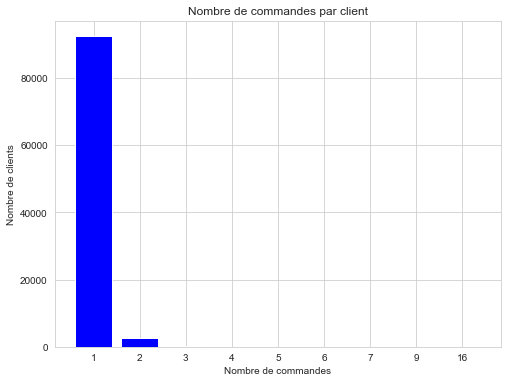

In [367]:
plt.figure()
fig = plt.figure(figsize=(8, 6))
plt.title('Nombre de commandes par client')
plt.bar(range(temp_plot.shape[0]),
        temp_plot['Nombre de clients'], color="blue")
plt.xticks(range(temp_plot.shape[0]), temp_plot.index)
plt.xlabel('Nombre de commandes')
plt.ylabel('Nombre de clients')

### 3.5.2 Données quantitatives

In [368]:
desc_quanti(data, 'num_reviews_mean', 'review_score_mean_per_order',
            'num_comment_title_mean', 'num_comment_message_mean',
            'num_payment_type_credit_card', 'num_payment_type_voucher',
            'num_payment_type_boleto', 'num_payment_type_debit_card',
            'order_value_mean', 'installments_per_order_mean',
            'installments_per_order_min', 'installments_per_order_max',
            'num_paiements_per_order_mean', 'num_paiements_per_order_min',
            'num_paiements_per_order_max', 'num_products_per_order_min',
            'num_products_per_order_max', 'num_products', 'num_sellers',
            'price_min', 'price_max', 'price_mean', 'freight_value_min',
            'freight_value_max', 'freight_value_mean',
            'num_orders', 'payment_type_credit_card_mean',
            'payment_type_voucher_mean', 'payment_type_boleto_mean',
            'payment_type_debit_card_mean', 'num_products_per_order_mean')

,count,mean,std,min,25%,50%,75%,max,NaN
num_reviews_mean,95420.0,1.00,0.05,1.00,1.00,1.00,1.00,2.40,0.0
review_score_mean_per_order,95420.0,4.09,1.34,1.00,4.00,5.00,5.00,5.00,0.0
num_comment_title_mean,95420.0,0.12,0.32,0.00,0.00,0.00,0.00,2.00,0.0
num_comment_message_mean,95420.0,0.42,0.49,0.00,0.00,0.00,1.00,2.00,0.0
num_payment_type_credit_card,95420.0,0.91,0.73,0.00,1.00,1.00,1.00,24.00,0.0
num_payment_type_voucher,95420.0,0.07,0.56,0.00,0.00,0.00,0.00,75.00,0.0
num_payment_type_boleto,95420.0,0.24,0.57,0.00,0.00,0.00,0.00,20.00,0.0
num_payment_type_debit_card,95420.0,0.02,0.15,0.00,0.00,0.00,0.00,7.00,0.0
order_value_mean,95419.0,161.21,221.36,9.59,62.44,105.84,177.30,13664.08,1.0
installments_per_order_mean,95419.0,2.90,2.68,0.00,1.00,2.00,4.00,24.00,1.0


### 3.5.3 Données temporelles

Date de la première commande:

In [369]:
min(data['order_purchase_timestamp_min'])

Timestamp('2016-09-04 21:15:19')

Date de la commande la plus récente:

In [370]:
max(data['order_purchase_timestamp_max'])

Timestamp('2018-09-03 09:06:57')

Délais minimal de review :

In [371]:
data.columns

Index(['customer_unique_id', 'order_purchase_timestamp_min',
       'order_purchase_timestamp_max', 'order_purchase_timestamp_max_dt',
       'delay_last_order', 'order_purchase_timestamp_min_dt',
       'delay_first_order', 'num_reviews_mean', 'review_score_mean_per_order',
       'num_comment_title_mean', 'num_comment_message_mean',
       'review_delay_min_days', 'review_delay_max_days',
       'num_payment_type_credit_card', 'num_payment_type_voucher',
       'num_payment_type_boleto', 'num_payment_type_debit_card',
       'order_value_mean', 'installments_per_order_mean',
       'installments_per_order_min', 'installments_per_order_max',
       'num_paiements_per_order_mean', 'num_paiements_per_order_min',
       'num_paiements_per_order_max', 'num_products_per_order_min',
       'num_products_per_order_max', 'num_products', 'num_sellers',
       'price_min', 'price_max', 'price_mean', 'freight_value_min',
       'freight_value_max', 'freight_value_mean', 'category_art_film_music'

In [372]:
min(data['review_delay_min_days'])

0

Délais maximal de review:

In [373]:
max(data['review_delay_max_days'])

518

### 3.5.4 Données qualitatives

Nous allons importer la table croisée de catégories qui nous a servie pour agréger les classes et vérifier la somme de chaque classe agrégée. 

In [374]:
categories = {'Category name': ['art_film_music',
                                'auto', 'baby', 'books',
                                'electronics', 'fashion_accessories',
                                'food_drinks', 'health_beauty', 'home',
                                'office', 'other', 'pet_shop',
                                'sports_leisure', 'tools', 'toys'],
              "Nombre d'articles": [sum(data['category_art_film_music']),
                                    sum(data['category_auto']), sum(
                                        data['category_baby']), sum(data['category_books']),
                                    sum(data['category_electronics']), sum(
                  data['category_fashion_accessories']),
    sum(data['category_food_drinks']), sum(
                  data['category_health_beauty']), sum(data['category_home']),
    sum(data['category_office']), sum(
                  data['category_other']), sum(data['category_pet_shop']),
    sum(data['category_sports_leisure']), sum(data['category_tools']), sum(data['category_toys'])]}

In [375]:
categories = DataFrame(categories)

In [376]:
categories.sort_values("Nombre d'articles", inplace=True)

In [377]:
categories

,Category name,Nombre d'articles
3,books,880
10,other,992
0,art_film_music,1029
6,food_drinks,1167
11,pet_shop,1947
2,baby,3065
1,auto,4235
13,tools,6719
14,toys,7913
12,sports_leisure,8671


<Figure size 864x864 with 0 Axes>

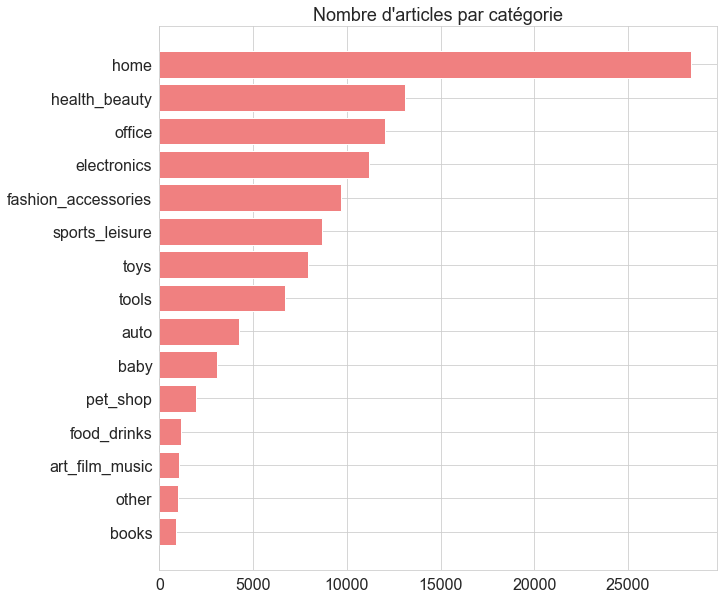

In [378]:
plt.figure()
fig = plt.figure(figsize=(10, 10))
# We define a fake subplot that is in fact only the plot
ax = fig.add_subplot(111)

plt.title("Nombre d'articles par catégorie", fontsize=18)
plt.barh(range(categories.shape[0]),
         categories["Nombre d\'articles"], color="lightcoral")
plt.yticks(range(categories.shape[0]), categories["Category name"])
ax.tick_params(axis='both', which='major', labelsize=16)

In [379]:
desc_quali(data, 'city_sup_1m')

,city_sup_1m,Pourcentage
0,61475.0,64.43
1,33945.0,35.57
NaN,0.0,0.00


Pour décrire variable state :

In [380]:
state = {'State': ['Sao Paulo', 'Rio de Janeiro', 'Minas Gerais', 'Rio Grande do Sul', 'Parana', 'Santa Catarina', 'Bahia', 'Other'],
         'Effectif': [sum(data['state_SP']), sum(data['state_RJ']), sum(data['state_MG']), sum(data['state_RS']), sum(data['state_PR']), sum(data['state_SC']), sum(data['state_BA']), sum(data['state_other'])]}

In [381]:
state = DataFrame(state)

In [382]:
state

,State,Effectif
0,Sao Paulo,39964
1,Rio de Janeiro,12300
2,Minas Gerais,11176
3,Rio Grande do Sul,5248
4,Parana,4840
5,Santa Catarina,3509
6,Bahia,3257
7,Other,15126


In [383]:
state.sort_values('Effectif', ascending=True, inplace=True)

<Figure size 864x864 with 0 Axes>

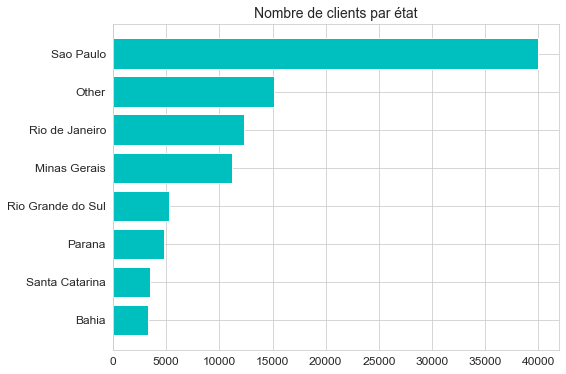

In [384]:
plt.figure()
fig = plt.figure(figsize=(8, 6))
# We define a fake subplot that is in fact only the plot
ax = fig.add_subplot(111)

plt.title("Nombre de clients par état", fontsize=14)
plt.barh(range(state.shape[0]), state["Effectif"], color="c")
plt.yticks(range(state.shape[0]), state["State"])
ax.tick_params(axis='both', which='major', labelsize=12)